<a href="https://colab.research.google.com/github/VilasSonawane/Bank-Marketing-Effectiveness-Prediction-Model/blob/main/Vilas_Copy_of_Capstone_Project_on_Bank_Marketing_Effectiveness_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [120]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# Importing the dataset
bank_df = pd.read_csv('/content/drive/MyDrive/Bank Marketing Effectiveness Prediction/Data & Resources/bank-full.csv' ,sep =';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **Data Inspection**

In [123]:
bank_df.shape

(45211, 17)

In [124]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [125]:
bank_df.describe(include = "all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


# **Exploratary Data Analysis**

In [126]:
bank_df.isnull().sum().sort_values(ascending = False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [127]:
# find Categarical variables
categorical = [var for var in bank_df.columns if bank_df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
categorical

There are 10 categorical variables


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [128]:
# find Numerical variables
numerical = [var for var in bank_df.columns if bank_df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
numerical

There are 7 numerical variables


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [129]:
# Value Counts of Categarical Features
for var in categorical:
  print('--'*50)
  print(f'Value Counts of Feature {var}')
  print(bank_df[var].value_counts())
  print('--'*50)
  print(f' % Value Counts of Feature {var}')
  print(bank_df[var].value_counts()/ np.float(len(bank_df))*100 )
  print()

----------------------------------------------------------------------------------------------------
Value Counts of Feature job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
----------------------------------------------------------------------------------------------------
 % Value Counts of Feature job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

----------------------------------------------------------------------------------------------------

In [130]:
# No of Unique Values in Numarical Features
for var in numerical:
  print('--'*50)
  print(f' Unique values of Feature {var}')
  print(bank_df[var].unique())
  print()

----------------------------------------------------------------------------------------------------
 Unique values of Feature age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

----------------------------------------------------------------------------------------------------
 Unique values of Feature balance
[ 2143    29     2 ...  8205 14204 16353]

----------------------------------------------------------------------------------------------------
 Unique values of Feature day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

----------------------------------------------------------------------------------------------------
 Unique values of Feature duration
[ 261  151   76 ... 1298 1246 1556]

-----------------------------------------------------

# **Univariate Analysis**

In [131]:
bank_df['Outcome_y'] = (bank_df['y']=='yes').astype(int)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Outcome_y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


# **Categorical Features**

# **1. Job**

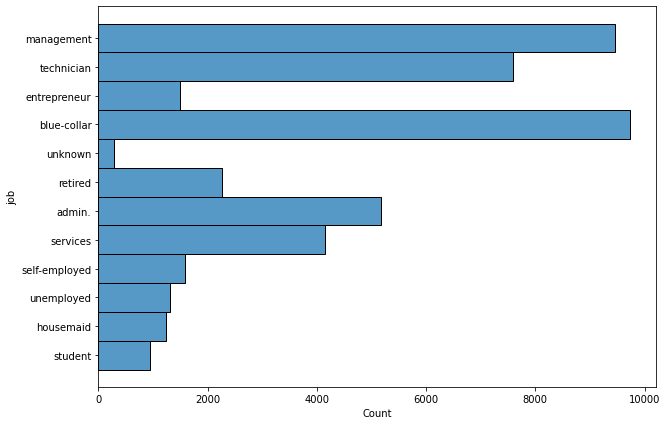

In [132]:
plt.figure(figsize=(10, 7))
sns.histplot(data=bank_df, y="job", palette="pastel")

#**2.Value Counts for All Categorical variables**

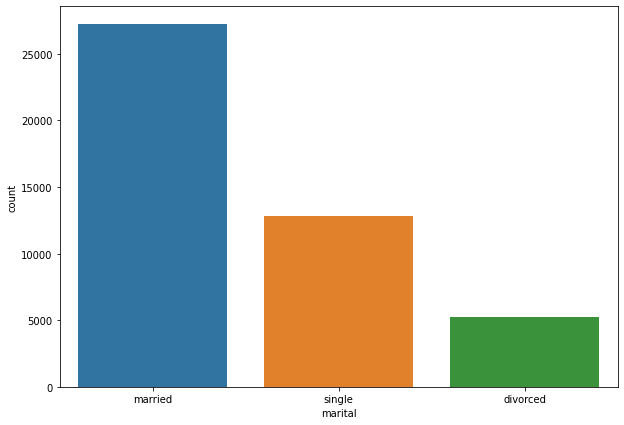

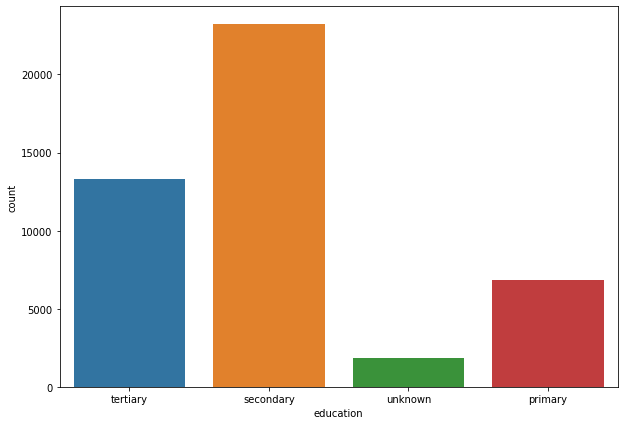

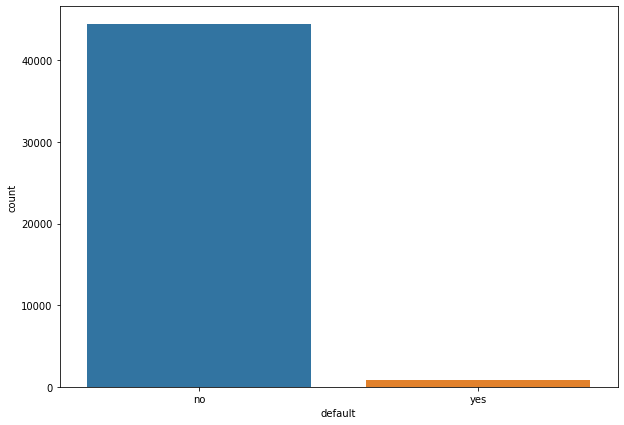

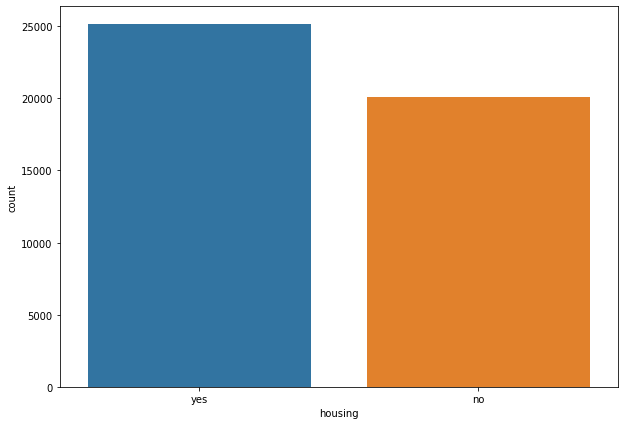

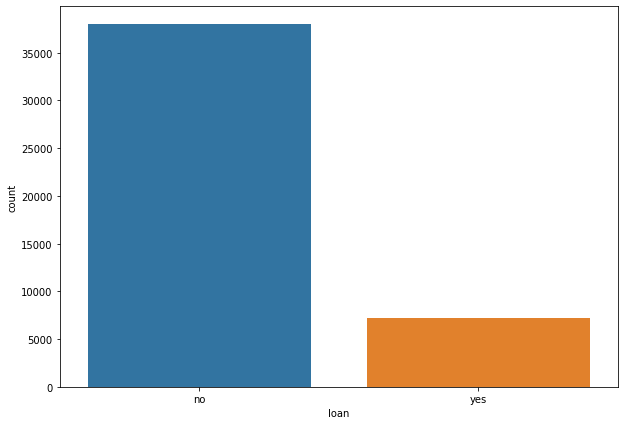

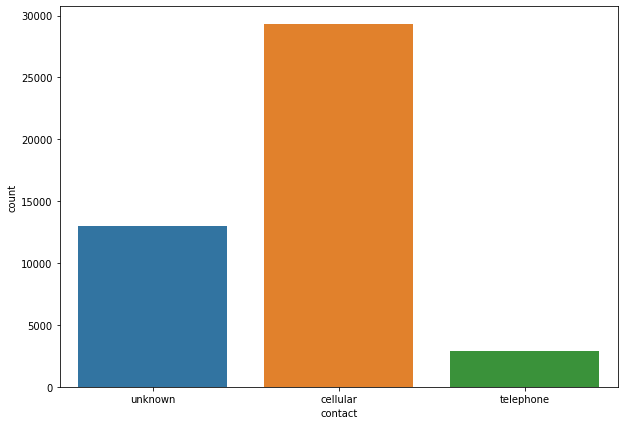

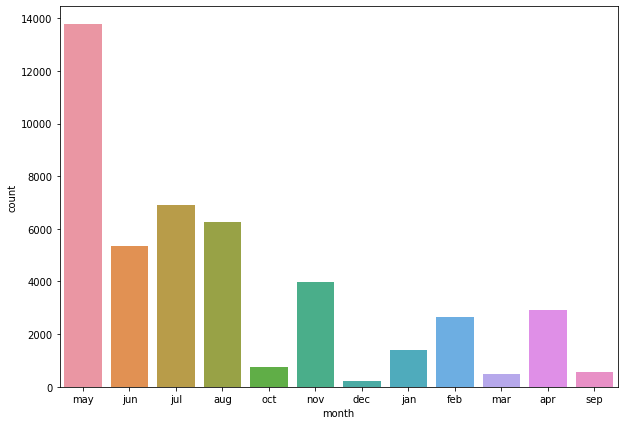

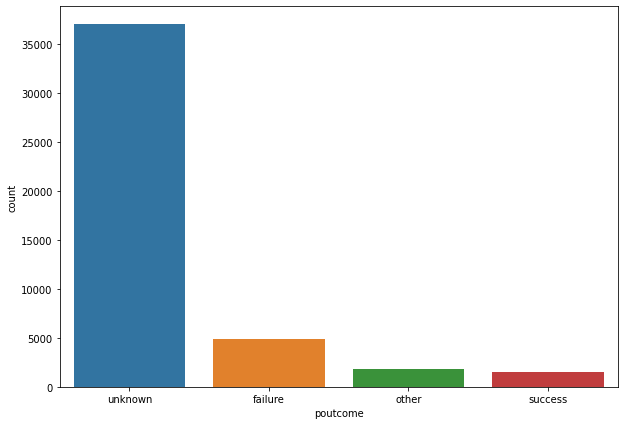

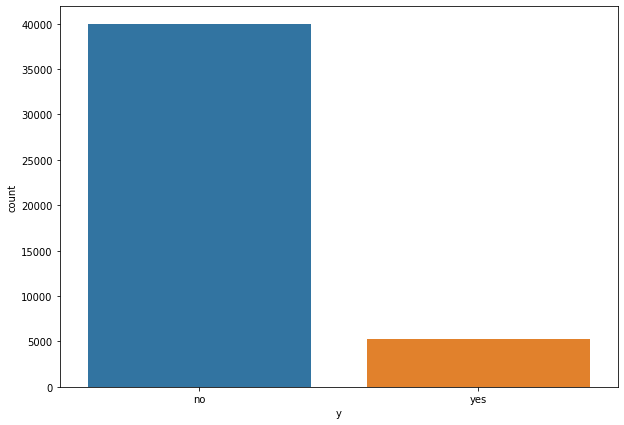

In [133]:
# Value Counts of Categarical Features
for var in categorical[1:]:
  plt.figure(figsize=(10, 7))
  sns.countplot(data=bank_df, x=var)

# **Numarical Features**

# **1. Age**

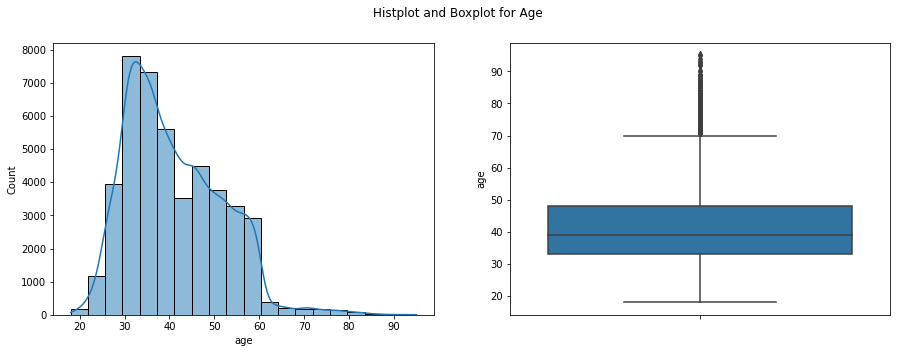

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for Age')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="age", bins=20,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="age")



In [135]:
# for var in numerical:
#   fig, axes = plt.subplots(1, 2, figsize=(15, 5))
#   fig.suptitle('Histplot and Boxplot for Age')
# # HIstplot
#   sns.histplot(ax=axes[0], data=bank_df, x= var, bins=20,kde=True)
# # BoxPlot
#   sns.boxplot(ax=axes[1],data=bank_df, y= var)


# **2. balance**

In [136]:
print(bank_df.balance.unique().tolist())

[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270, 390, 6, 71, 162, 229, 13, 52, 60, 0, 723, 779, 23, 50, -372, 255, 113, -246, 265, 839, 378, 39, 10635, 63, -7, -3, 506, 2586, 49, 104, 529, 96, -171, -364, 1291, -244, -76, -103, 243, 424, 306, 24, 179, 989, 249, 790, 154, 6530, 100, 59, 1205, 12223, 5935, 25, 282, 1937, 384, 582, 91, 206, 164, 690, 2343, 137, 173, 45, 1270, 16, 486, 152, 290, 54, -37, 101, 383, 81, -674, 90, 128, 151, 61, 30, 523, 31, 79, -34, 448, 144, 351, -67, 262, 56, 26, 3, 41, 7, 105, 818, -16, 2476, 1185, 217, 1685, 802, 94, 517, 947, 42, 37, 57, 22, 8, 293, 348, -19, -4, 18, 139, 1883, 216, 782, 904, 1705, 47, 176, 1225, 86, 82, 271, 1378, 184, 1357, 19, 434, 92, 1151, 51, 214, 1161, 787, 253, 211, 235, 4384, 4080, 53, 2127, 377, 73, 445, 307, 155, 400, 1428, 219, 575, 298, 5699, 257, -390, 330, 195, 301, -41, 483, 28, 965, 324, -69, 205, 278, 1065, 34, 1033, 1467, -12, 388, 294, 1827, 627, 315, 66, -9, 349, 3237, 275, 207, 2248, 428, 140, 297, 279, 901, 2573, 14

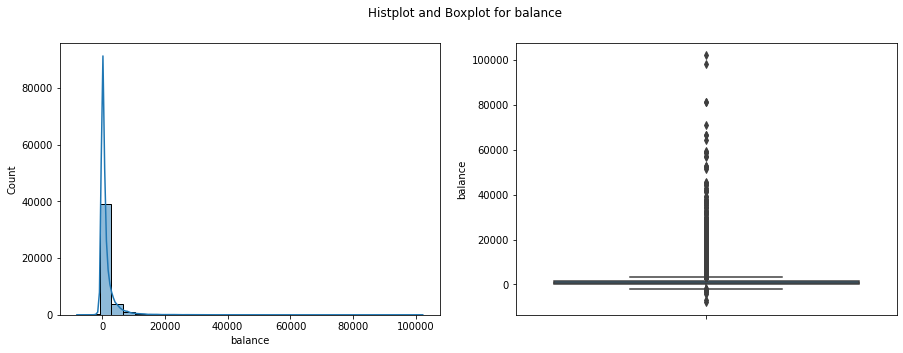

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for balance')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="balance", bins=30,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="balance")

# **3. Day**

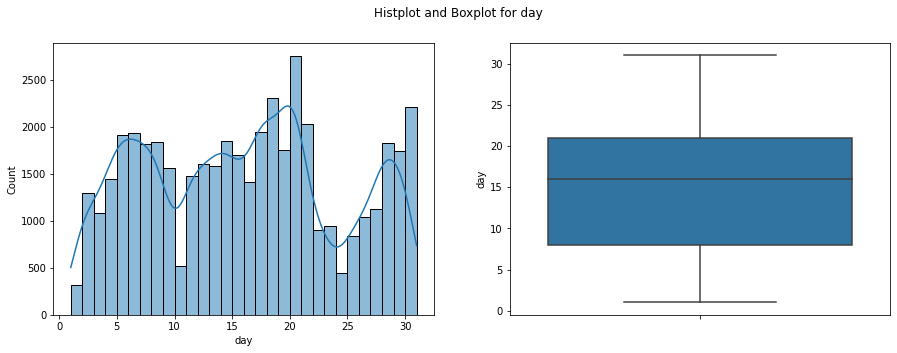

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for day')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="day", bins=30,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="day")

# **4.Duration**

In [139]:
print(bank_df.duration.unique().tolist())

[261, 151, 76, 92, 198, 139, 217, 380, 50, 55, 222, 137, 517, 71, 174, 353, 98, 38, 219, 54, 262, 164, 160, 342, 181, 172, 296, 127, 255, 348, 225, 230, 208, 226, 336, 242, 365, 1666, 577, 180, 22, 1492, 616, 355, 363, 266, 253, 179, 787, 145, 104, 13, 185, 1778, 138, 812, 391, 357, 91, 528, 273, 158, 177, 258, 154, 291, 176, 211, 349, 272, 193, 212, 20, 1042, 246, 529, 1467, 1389, 188, 48, 213, 583, 221, 173, 426, 287, 101, 203, 197, 257, 124, 229, 400, 190, 21, 514, 849, 194, 144, 286, 107, 247, 518, 364, 178, 439, 79, 120, 175, 61, 78, 143, 579, 677, 345, 100, 125, 136, 73, 541, 163, 301, 46, 204, 157, 243, 186, 610, 2033, 85, 114, 57, 238, 93, 128, 303, 558, 270, 228, 99, 240, 673, 233, 1056, 250, 252, 130, 412, 19, 458, 717, 313, 683, 1077, 416, 146, 167, 315, 140, 346, 562, 142, 67, 309, 248, 256, 82, 477, 611, 471, 381, 42, 251, 408, 215, 216, 366, 210, 288, 168, 338, 410, 300, 1419, 27, 18, 730, 746, 121, 40, 206, 389, 702, 117, 232, 39, 282, 714, 227, 119, 361, 350, 332, 113, 

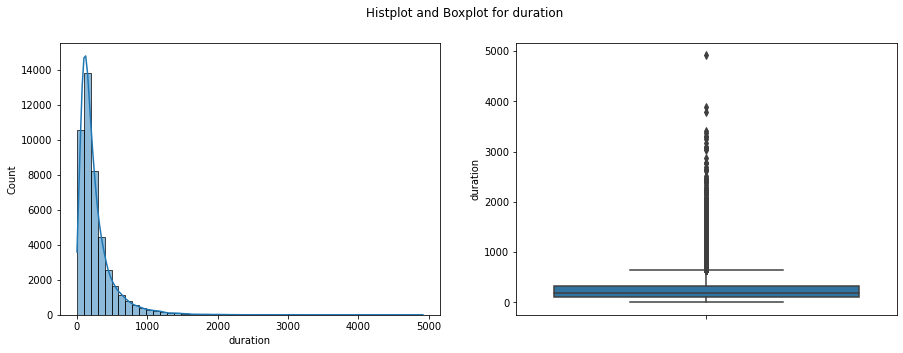

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for duration')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="duration", bins=50,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="duration")

# **5.Campaign**

In [141]:
bank_df.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

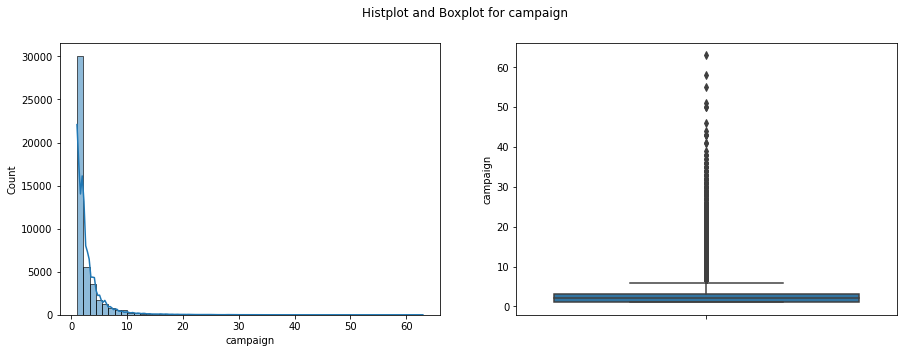

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for campaign')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="campaign", bins=55,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="campaign")

# **6.Pdays**

In [143]:
print(bank_df.pdays.unique().tolist())

[-1, 151, 166, 91, 86, 143, 147, 89, 140, 176, 101, 174, 170, 167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164, 132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152, 96, 103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158, 168, 97, 182, 127, 130, 194, 125, 105, 102, 26, 179, 28, 183, 155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189, 8, 144, 191, 184, 177, 5, 99, 133, 93, 92, 10, 100, 156, 198, 106, 153, 146, 128, 7, 121, 160, 107, 90, 27, 197, 136, 139, 122, 157, 149, 135, 30, 114, 98, 192, 163, 34, 95, 141, 31, 199, 94, 108, 29, 268, 247, 253, 226, 244, 239, 245, 204, 231, 238, 258, 230, 254, 265, 71, 223, 246, 250, 266, 240, 205, 261, 259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227, 206, 224, 249, 235, 228, 263, 2, 270, 232, 252, 207, 200, 269, 233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 221, 202, 216, 201, 257, 229, 210, 217, 75, 213, 73, 76, 267, 211, 215, 77, 236, 82, 6, 209, 274, 1, 243, 212, 275, 80, 276, 9, 2

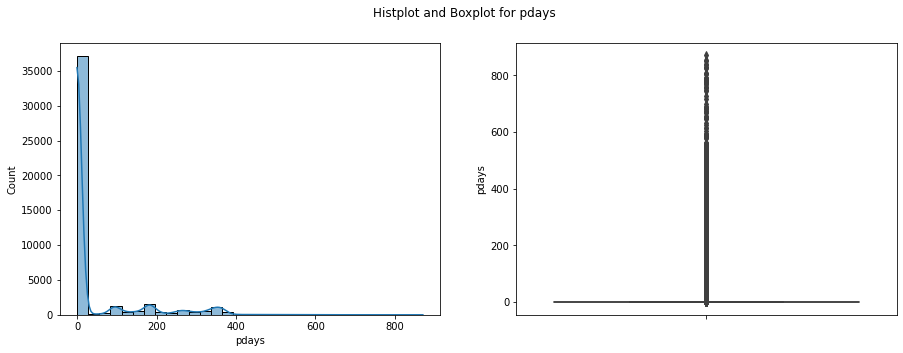

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for pdays')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="pdays", bins=31,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="pdays")

# **7. previous**

In [145]:
print(bank_df.previous.unique().tolist())

[0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9, 21, 8, 14, 15, 26, 37, 13, 25, 20, 27, 17, 23, 38, 29, 24, 51, 275, 22, 19, 30, 58, 28, 32, 40, 55, 35, 41]


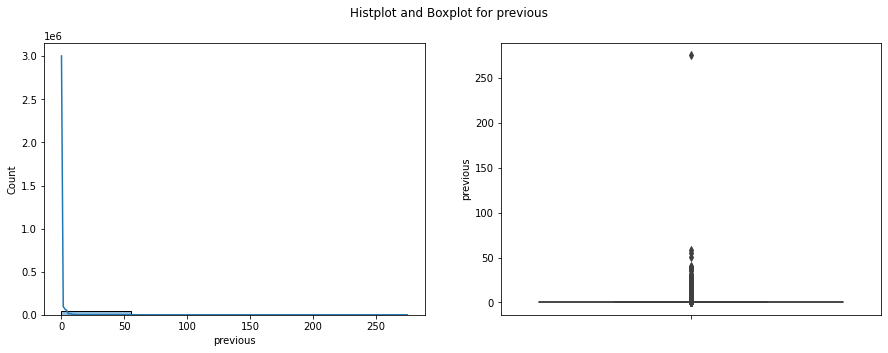

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for previous')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="previous", bins=5,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="previous")

# **Multivariate Analyis**

In [147]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'Outcome_y'],
      dtype='object')

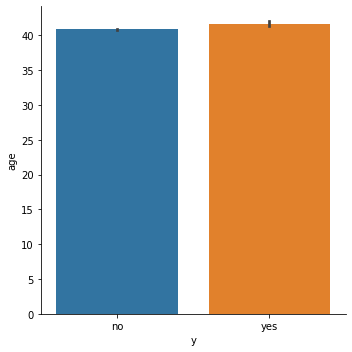

In [148]:
sns.catplot( y="age", x="y",kind="bar",data=bank_df)

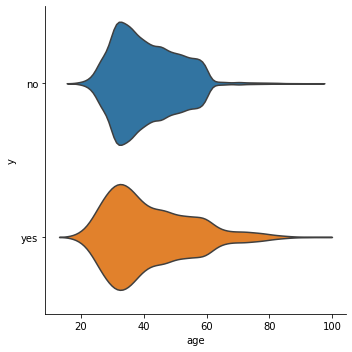

In [149]:
sns.catplot(x="age", y="y", kind="violin", inner=None, data=bank_df)


# **Analsing the Effect of Features on Conversion of Success i.e. (Subscription Of Term Deposit)**

# **1. Type of Job**

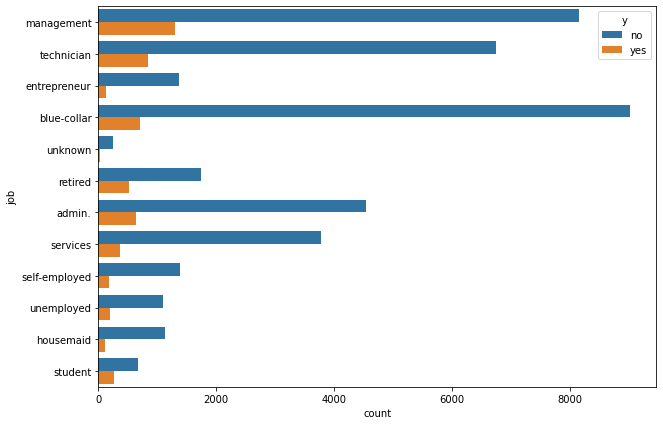

In [150]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.countplot(y = bank_df['job'], hue=bank_df['y'])
plt.show()

In [151]:
x = bank_df.groupby('job').mean().reset_index()
x

,job,age,balance,day,duration,campaign,pdays,previous,Outcome_y
0,admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027
1,blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750
2,entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717
3,housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903
4,management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556
5,retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915
6,self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429
7,services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830
8,student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780
9,technician,39.314598,1252.632092,16.408582,252.904962,2.906805,37.195077,0.574569,0.110570


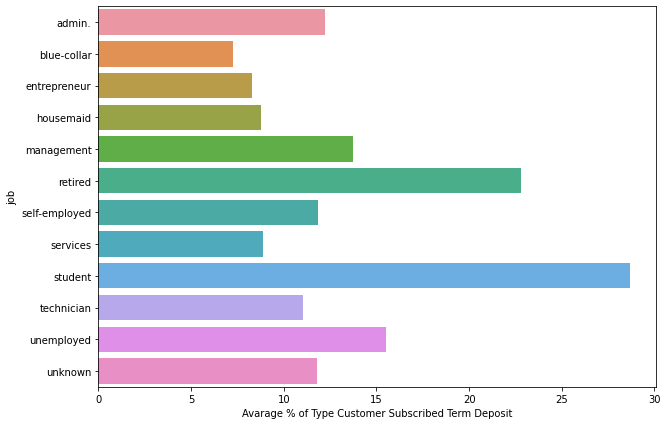

In [152]:
# % of Average Custmer who have subscribed our Product Jobwise
plt.figure(figsize=(10,7))
q=sns.barplot(x=(x.Outcome_y)*100, y = x.job)
q.set_xlabel("Avarage % of Type Customer Subscribed Term Deposit")
plt.show()

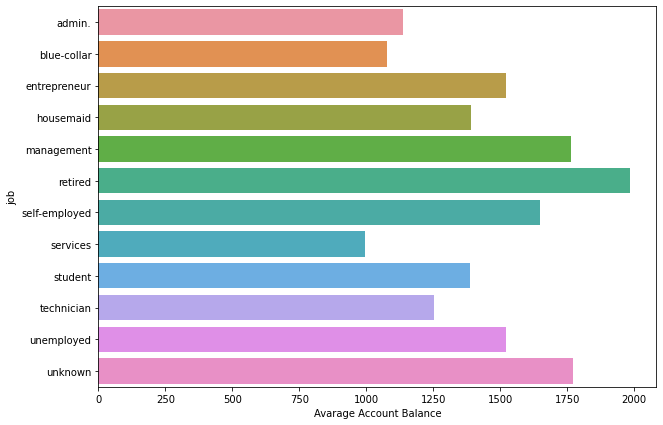

In [153]:
# Avarage  Account Balance of Custmer based on their Job.
plt.figure(figsize=(10,7))
p=sns.barplot(x=x.balance, y = x.job)
p.set_xlabel("Avarage Account Balance")
plt.show()

# **2.Marital Status**

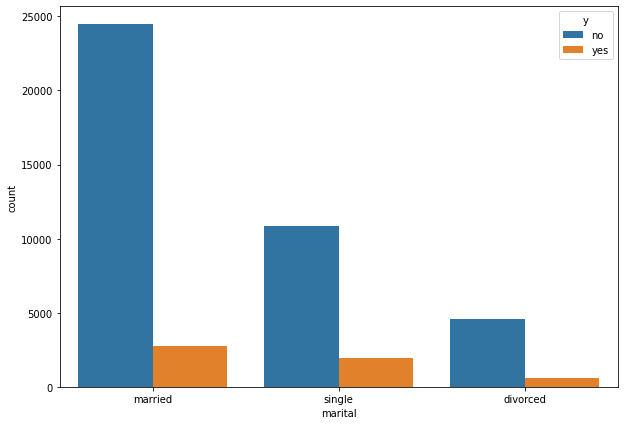

In [154]:
# Customer Subscribed Term Deposit Based on Marital Status
plt.figure(figsize=(10,7))
sns.countplot(bank_df['marital'], hue=bank_df['y'])
plt.show()

In [155]:
x = bank_df.groupby('marital').mean().reset_index()
x

,marital,age,balance,day,duration,campaign,pdays,previous,Outcome_y
0,divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373,0.119455
1,married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235
2,single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690,0.149492


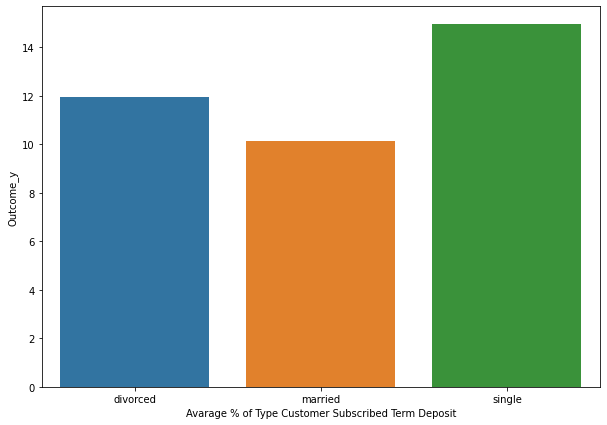

In [156]:
# % of Average Custmer who have subscribed our Product based on Marrital Status
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.marital)
q.set_xlabel("Avarage % of Type Customer Subscribed Term Deposit")
plt.show()

# **3. Type of Education**

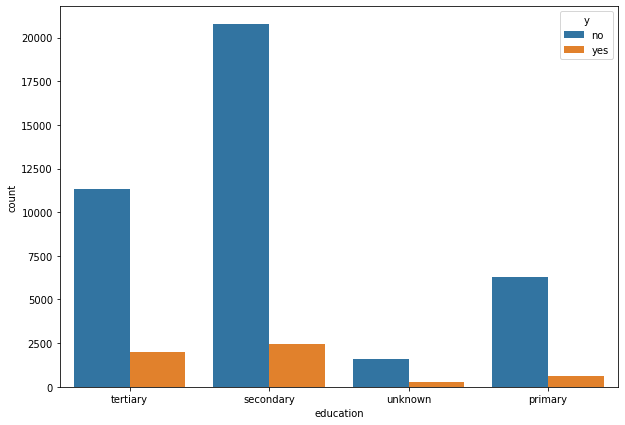

In [157]:
# # Customer Subscribed Term Deposit Based on Education Qualification
plt.figure(figsize=(10,7))
sns.countplot(bank_df['education'], hue=bank_df['y'])
plt.show()

In [158]:
x = bank_df.groupby('education').mean().reset_index()
x

,education,age,balance,day,duration,campaign,pdays,previous,Outcome_y
0,primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
1,secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
2,tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064
3,unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422,0.135703


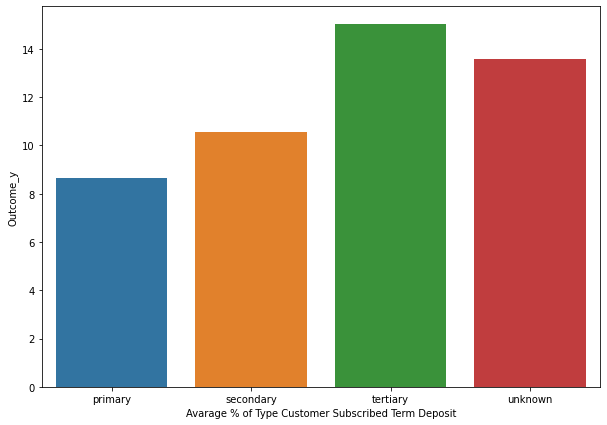

In [159]:
# % of Average Custmer who have subscribed our Product based on education Qualification
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.education)
q.set_xlabel("Avarage % of Type Customer Subscribed Term Deposit")
plt.show()

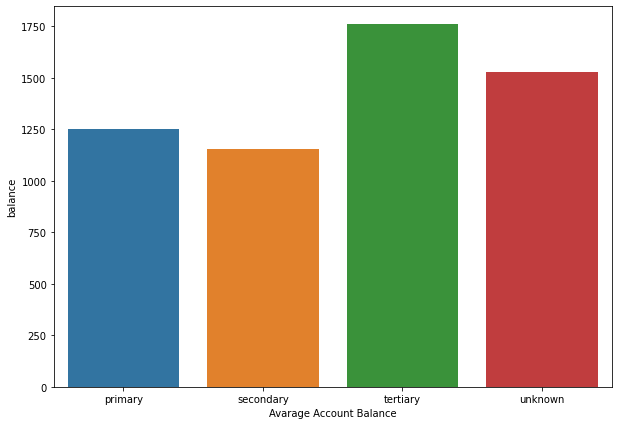

In [160]:
# Avarage  Account Balance of Custmer based on their Educational Qualification.
plt.figure(figsize=(10,7))
p=sns.barplot(y=x.balance, x = x.education)
p.set_xlabel("Avarage Account Balance")
plt.show()

# **4. Default In loan Payment**

In [161]:
x = bank_df.groupby('default').mean().reset_index()
x

,default,age,balance,day,duration,campaign,pdays,previous,Outcome_y
0,no,40.961934,1389.806424,15.795792,258.512749,2.756780,40.604536,0.586044,0.117961
1,yes,39.534969,-137.624540,16.385276,239.115337,3.148466,18.042945,0.268712,0.063804


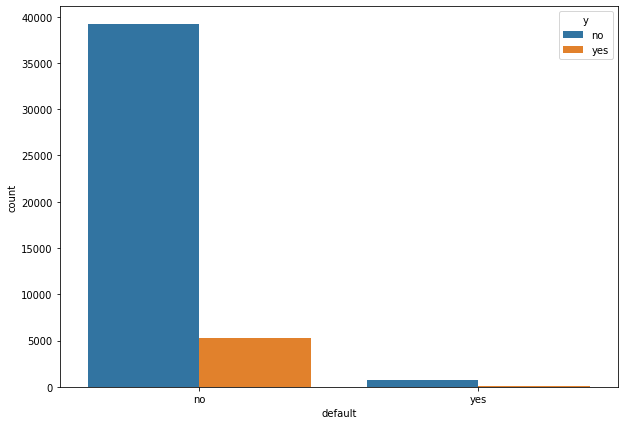

In [162]:
# # Customer Subscribed Term Deposit Based on Loan  default
plt.figure(figsize=(10,7))
sns.countplot(bank_df['default'], hue=bank_df['y'])
plt.show()

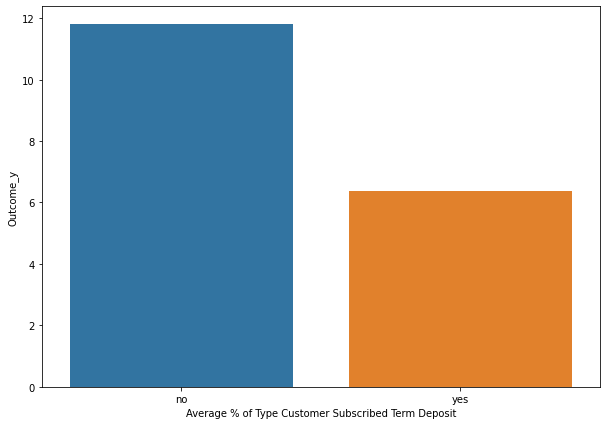

In [163]:
# % of Average Custmer who have subscribed our Product based on default
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.default)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **5. Those Who are having Housing Loan**

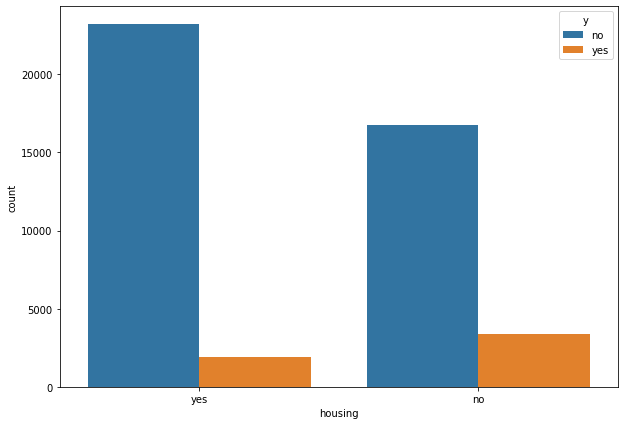

In [164]:
# # Customer Subscribed Term Deposit Based on Housing Loan
plt.figure(figsize=(10,7))
sns.countplot(bank_df['housing'], hue=bank_df['y'])
plt.show()

In [165]:
x = bank_df.groupby('housing').mean().reset_index()
x

,housing,age,balance,day,duration,campaign,pdays,previous,Outcome_y
0,no,43.139883,1596.501270,16.066929,256.700911,2.845625,26.288581,0.484787,0.167024
1,yes,39.175288,1175.103064,15.598249,259.331476,2.698488,51.312495,0.656665,0.077000


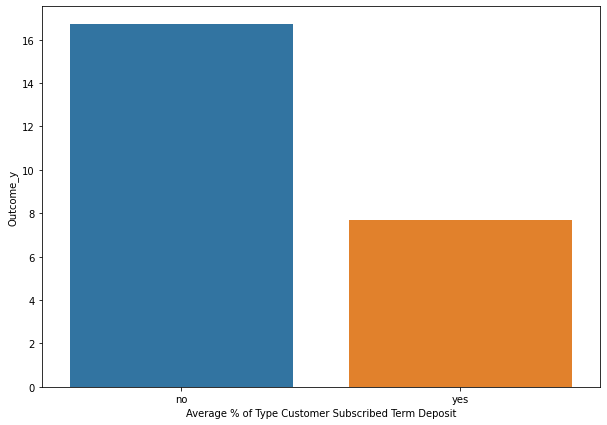

In [166]:
# % of Average Custmer who have subscribed our Product based on housing Loan
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.housing)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **6. Those who are having Personal Loan**

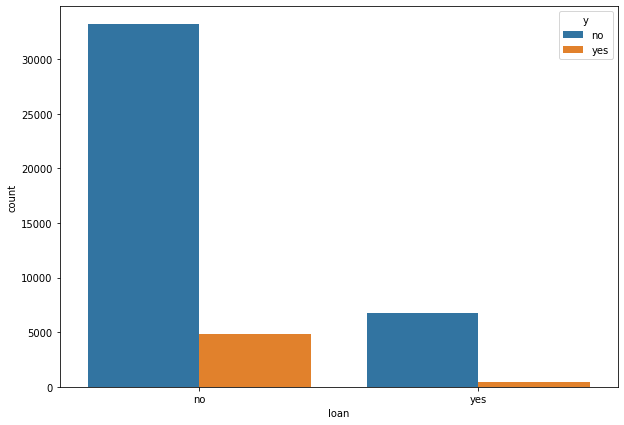

In [167]:
# # Customer Subscribed Term Deposit Based on Personal Loan
plt.figure(figsize=(10,7))
sns.countplot(bank_df['loan'], hue=bank_df['y'])
plt.show()

In [168]:
x = bank_df.groupby('loan').mean().reset_index()
x

,loan,age,balance,day,duration,campaign,pdays,previous,Outcome_y
0,no,41.008823,1474.453631,15.765085,259.559275,2.750336,41.192983,0.591435,0.126557
1,yes,40.555632,774.309912,16.023054,250.845389,2.834622,34.982054,0.522087,0.066814


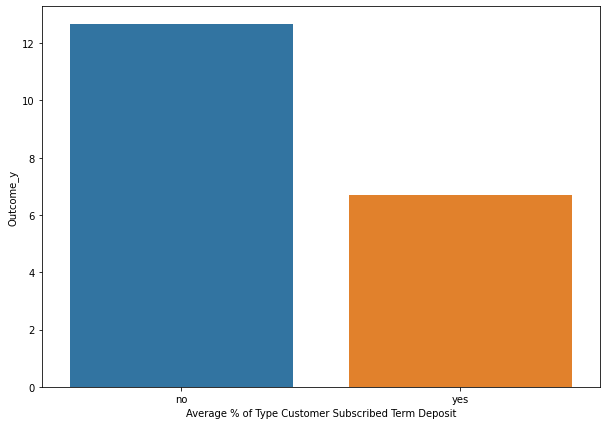

In [169]:
# % of Average Custmer who have subscribed our Product based on Personal Loan
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.loan)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **7. Based On Type on Contact Medium**

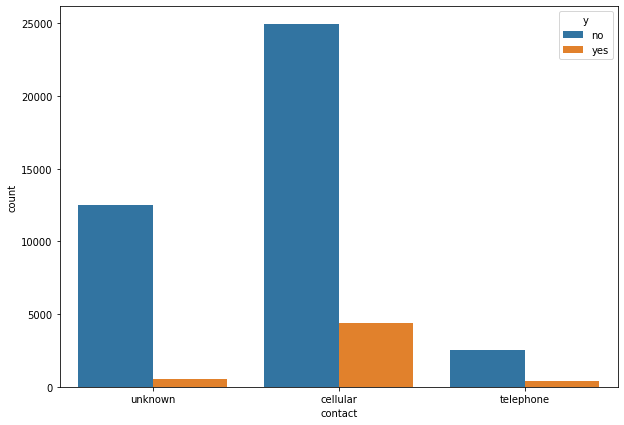

In [170]:
# # Customer Subscribed Term Deposit Based on Type of Contact Medium
plt.figure(figsize=(10,7))
sns.countplot(bank_df['contact'], hue=bank_df['y'])
plt.show()

In [171]:
x = bank_df.groupby('contact').mean().reset_index()
x

,contact,age,balance,day,duration,campaign,pdays,previous,Outcome_y
0,cellular,40.400785,1397.926993,15.930306,263.013966,2.690114,56.885129,0.804064,0.149189
1,telephone,47.837922,1803.704061,16.557467,235.366139,3.400895,46.312801,0.827254,0.134205
2,unknown,40.600077,1183.550384,15.360138,252.340476,2.787481,1.299386,0.021966,0.040707


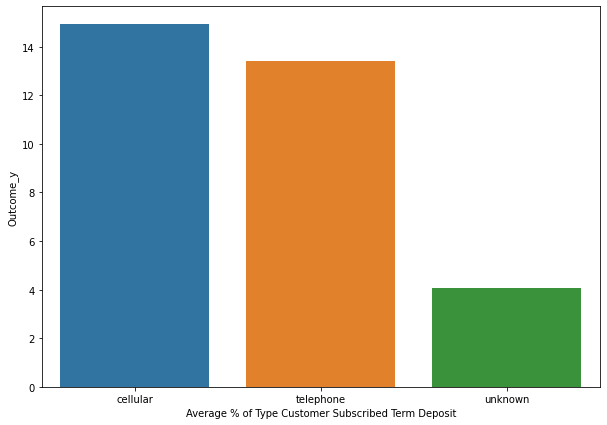

In [172]:
# % of Average Custmer who have subscribed our Product based on Type of contact
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.contact)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **8.Campaign In Month**

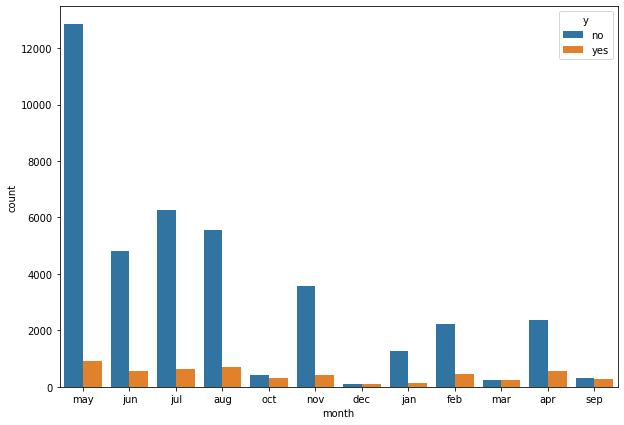

In [173]:
# # Customer Subscribed Term Deposit Based on Month
plt.figure(figsize=(10,7))
sns.countplot(bank_df['month'], hue=bank_df['y'])
plt.show()

In [174]:
x = bank_df.groupby('month').mean().reset_index()


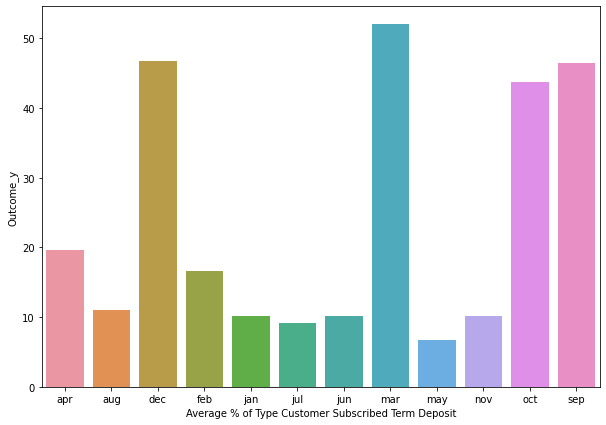

In [175]:
# % of Average Custmer who have subscribed our Product based on campaign in Month
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.month)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **9.Based On Total Call Duration**

In [176]:
x = bank_df.groupby('y').mean().reset_index()
x

,y,age,balance,day,duration,campaign,pdays,previous,Outcome_y
0,no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154,0.0
1,yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354,1.0


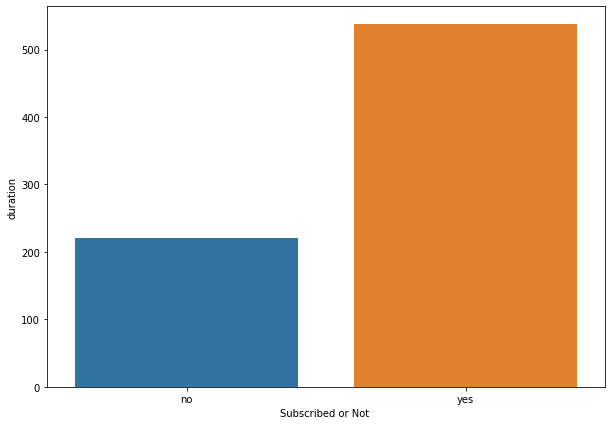

In [177]:
# % of Average Custmer who have subscribed our Product based on Call Duration in campaign
plt.figure(figsize=(10,7))
q=sns.barplot(x=x.y, y = x.duration)
q.set_xlabel("Subscribed or Not ")
plt.show()

## **We see that the feature ‘duration’, which tells us about the duration of the last call in seconds, is more than twice for the customers who bought the products than for customers who didn’t. ‘Campaign’, which denotes the number of calls made during the current campaign, are lower for customers who purchased the products.**

# **10.Outcome of previous campaign**

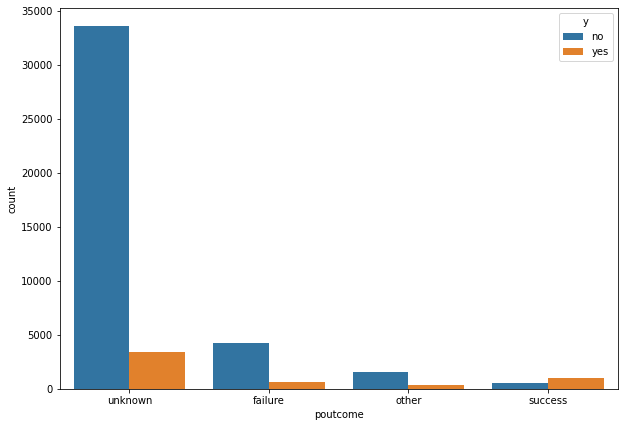

In [178]:
# Custmer who have subscribed our Product based on poutcome of previous campaign 
plt.figure(figsize=(10,7))
sns.countplot(bank_df['poutcome'], hue=bank_df['y'])
plt.show()

In [179]:
x = bank_df.groupby('poutcome').mean().reset_index()
x

,poutcome,age,balance,day,duration,campaign,pdays,previous,Outcome_y
0,failure,40.786166,1465.805550,14.166701,244.185880,1.980820,241.509284,2.896552,0.126097
1,other,39.752174,1487.411413,14.475000,255.715217,2.461413,229.683696,4.009239,0.166848
2,success,42.964924,1939.301125,14.449371,316.868961,1.806089,163.259431,3.075447,0.647253
3,unknown,40.932114,1318.722043,16.145621,257.738332,2.921886,-0.962039,0.000460,0.091615


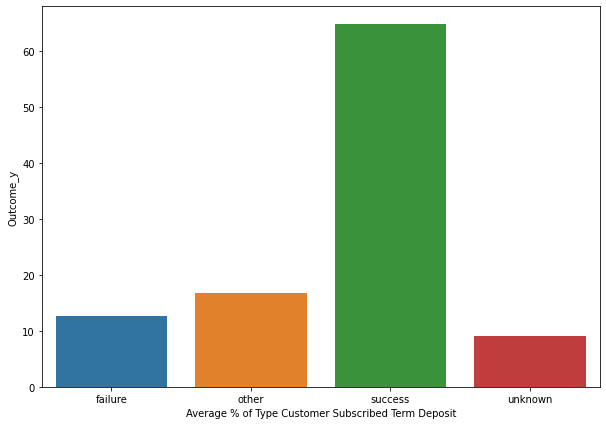

In [180]:
# % of Average Custmer who have subscribed our Product based on poutcome of previous campaign
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.poutcome)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **11.No of Call in Current Campaign**

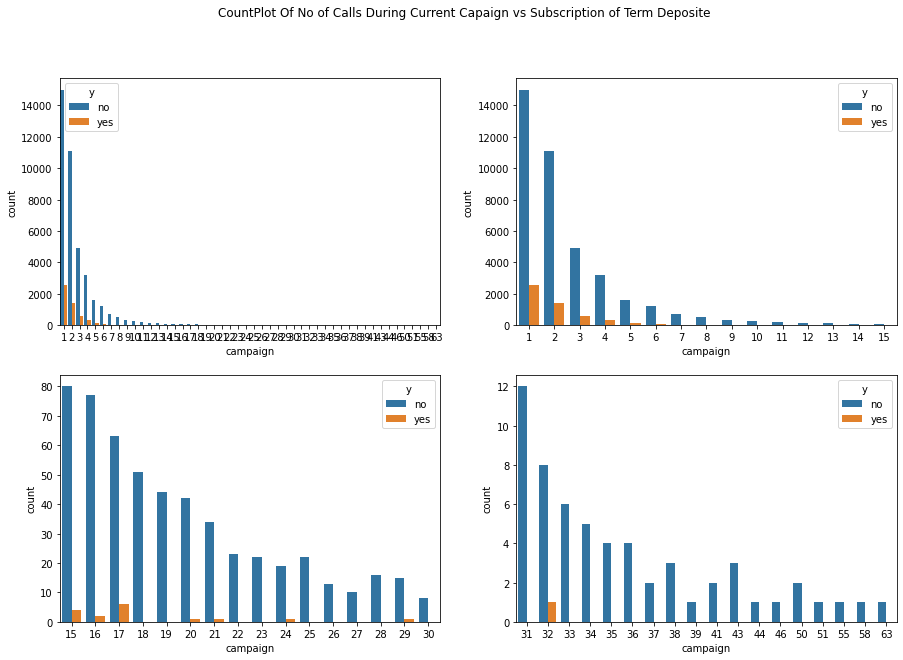

In [181]:
# Finding Relation between No of Call in Current compaign Vs Subscription of Term Deposit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('CountPlot Of No of Calls During Current Capaign vs Subscription of Term Deposite')
# Countplot
sns.countplot(ax=axes[0,0], data=bank_df, x="campaign",hue='y')
# Countplot for less than 15 calls during campaign
sns.countplot(ax=axes[0,1], data=bank_df, x=bank_df[bank_df['campaign']<=15].campaign,hue='y')
# Countplot for between 15 to 30 calls during campaign
sns.countplot(ax=axes[1,0], data=bank_df, x=bank_df[(bank_df.campaign >= 15) & (bank_df.campaign <= 30)].campaign,hue='y')
# # Countplot formore trhan 30 calls during campaign
sns.countplot(ax=axes[1,1], data=bank_df, x=bank_df[bank_df['campaign']>30].campaign,hue='y')

# **12.No of Call in Previous Campaign**

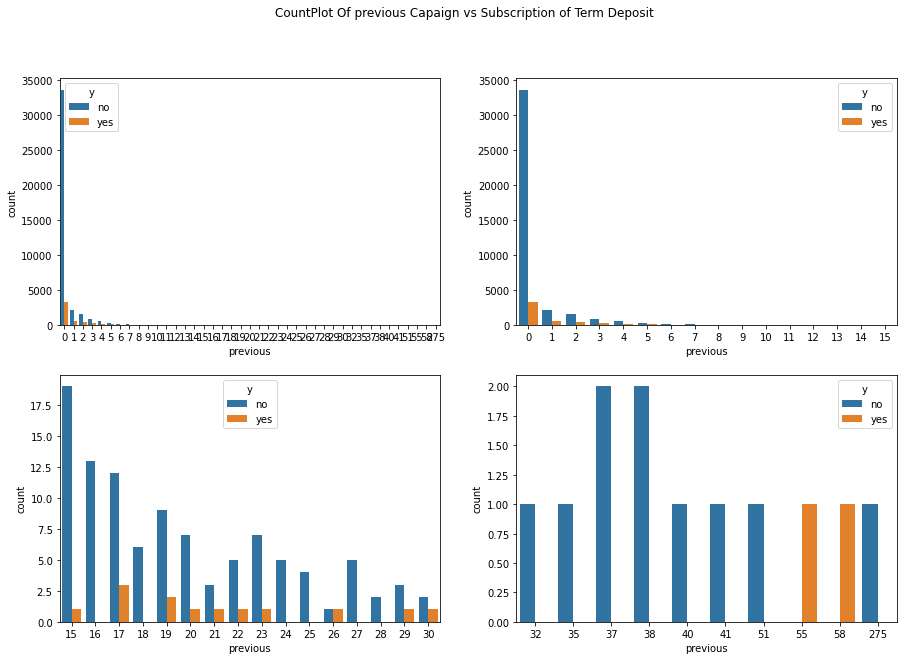

In [182]:
# Finding Relation between No of Call in previous compaign Vs Subscription of Term Deposit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('CountPlot Of previous Capaign vs Subscription of Term Deposit')
# Countplot
sns.countplot(ax=axes[0,0], data=bank_df, x="previous",hue='y')
# Countplot for less than 15 calls during previous campaign
sns.countplot(ax=axes[0,1], data=bank_df, x=bank_df[bank_df['previous']<=15].previous,hue='y')
# Countplot for between 15 to 30 calls during  previous campaign
sns.countplot(ax=axes[1,0], data=bank_df, x=bank_df[(bank_df.previous >= 15) & (bank_df.previous <= 30)].previous,hue='y')
# # Countplot formore trhan 30 calls during previous campaign
sns.countplot(ax=axes[1,1], data=bank_df, x=bank_df[bank_df['previous']>30].previous,hue='y')

# **13. Date of Month Last time called Customer**

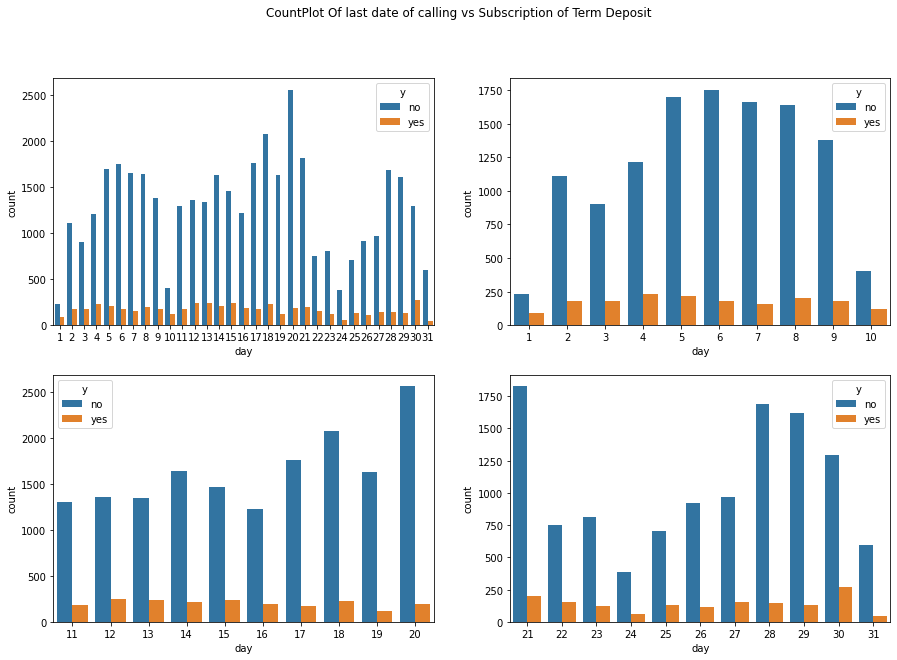

In [183]:
# Finding Relation between last date of calling Vs Subscription of Term Deposit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('CountPlot Of last date of calling vs Subscription of Term Deposit')
# Countplot
sns.countplot(ax=axes[0,0], data=bank_df, x="day",hue='y')
# Countplot for less than 10 days of month   
sns.countplot(ax=axes[0,1], data=bank_df, x=bank_df[bank_df['day']<=10].day,hue='y')
# Countplot for 11 to 20 days of month   
sns.countplot(ax=axes[1,0], data=bank_df, x=bank_df[(bank_df['day']>10) & (bank_df['day']<=20)].day,hue='y')
# Countplot for more that 20 days of month   
sns.countplot(ax=axes[1,1], data=bank_df, x=bank_df[bank_df['day']>20].day,hue='y')

# **14.Based on Age Group**

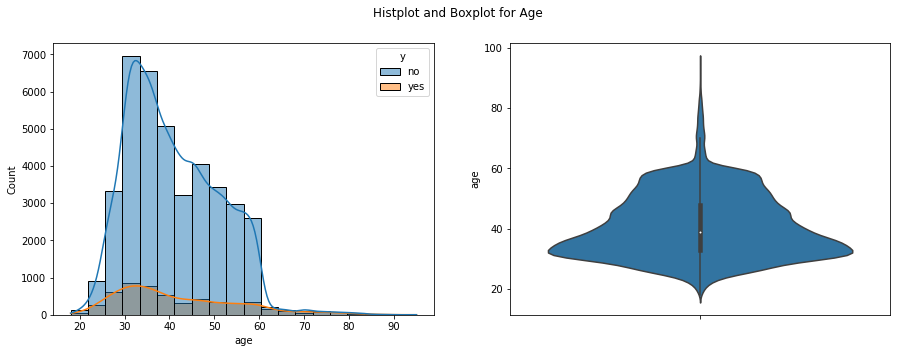

In [184]:
## Finding Relation between Age and Subscription of Term Deposit
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for Age')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="age",hue='y', bins=20,kde=True)
# BoxPlot
sns.violinplot(ax=axes[1],data=bank_df, y="age",hue='y',showmeans=True,showmedians=True)

In [185]:
#add a new column category next to the age group. 
category = pd.cut(bank_df.age,bins=[15,30,50,70,100],labels=['young','Adult','Upper_Middle','Elderly'])
bank_df.insert(2,'Age_Group',category)


In [186]:
x = bank_df.groupby('Age_Group').mean().reset_index()
x

,Age_Group,age,balance,day,duration,campaign,pdays,previous,Outcome_y
0,young,27.462162,1019.952774,15.766287,273.296159,2.556046,41.216501,0.563158,0.162873
1,Adult,39.053827,1286.708014,15.829323,254.324414,2.829773,41.632822,0.589435,0.097870
2,Upper_Middle,55.956661,1799.680999,15.795164,254.647468,2.747833,33.637888,0.528855,0.124886
3,Elderly,76.815195,2916.827515,15.227926,331.010267,2.135524,58.365503,1.213552,0.447639


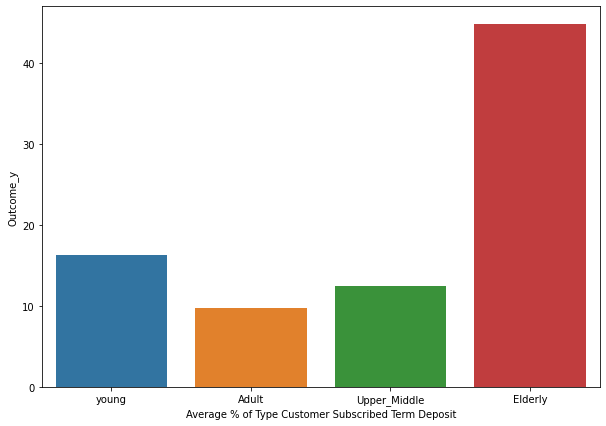

In [187]:
# % of Average Custmer who have subscribed our Product based on Age_Group
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.Age_Group)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

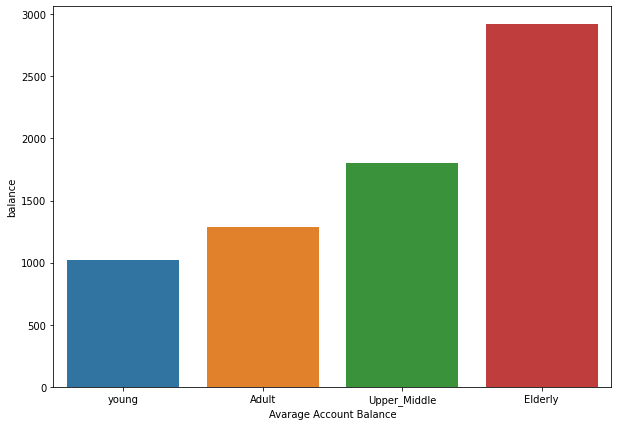

In [188]:
# Avarage  Account Balance of Custmer based on their Age Group
plt.figure(figsize=(10,7))
p=sns.barplot(y=x.balance, x = x.Age_Group)
p.set_xlabel("Avarage Account Balance")
plt.show()

# **15. Based on the Account Balance**

Text(0.5, 0, 'Customer whose Account balance More than 20000$')

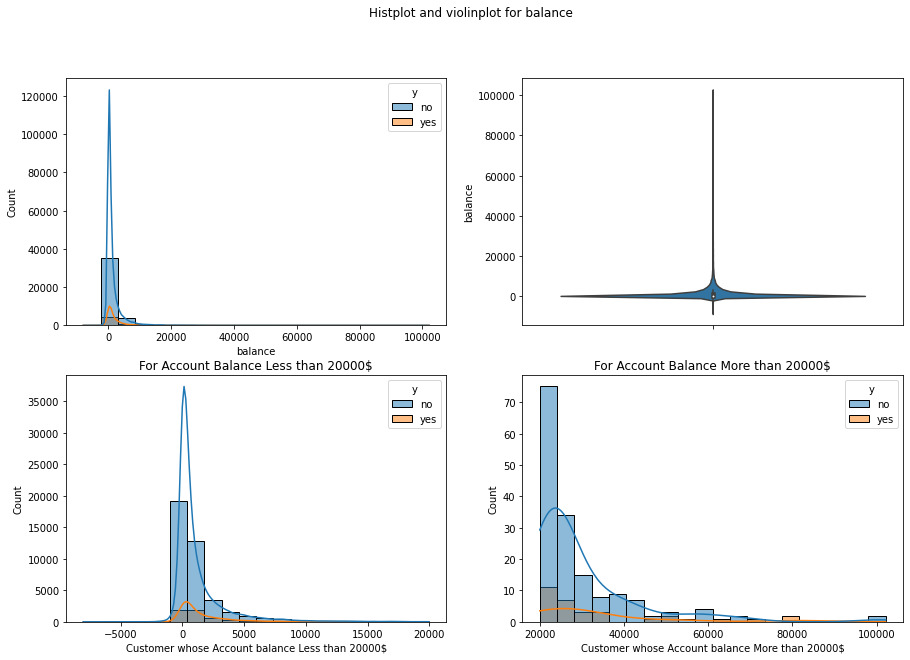

In [189]:
## Finding Relation between balance and Subscription of Term Deposit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Histplot and violinplot for balance')
# Histplot
sns.histplot(ax=axes[0,0], data=bank_df, x="balance",hue='y', bins=20,kde=True)
# violinplot
sns.violinplot(ax=axes[0,1],data=bank_df, y="balance",hue='y',showmeans=True,showmedians=True)
# Histplot  
p=sns.histplot(ax=axes[1,0], data=bank_df, x=bank_df[bank_df['balance']<20000].balance,hue='y',bins=20,kde=True)
p.set_title('For Account Balance Less than 20000$')
p.set_xlabel('Customer whose Account balance Less than 20000$')
# Histplot   
q=sns.histplot(ax=axes[1,1], data=bank_df, x=bank_df[bank_df['balance']>20000].balance,hue='y',bins=20,kde=True)
q.set_title('For Account Balance More than 20000$')
q.set_xlabel('Customer whose Account balance More than 20000$')

In [190]:
#add a new column category next to the Balance group. 
category = pd.cut(bank_df.balance,bins=[-10000,0,5000,10000,20000,40000,60000,80000,200000],labels=['Negative','0to5k','5kto10k','10to20k','20kto40k' ,'40kyo60k','60kto80k','morethan80k'])
bank_df.insert(7,'bal_Group',category)

In [191]:
x = bank_df.groupby('bal_Group').mean().reset_index()
x

,bal_Group,age,balance,day,duration,campaign,pdays,previous,Outcome_y
0,Negative,40.681868,-164.337088,16.382830,249.220604,2.999863,30.930357,0.399176,0.068956
1,0to5k,40.766545,992.725703,15.663056,258.568261,2.722767,42.142507,0.609331,0.123867
2,5kto10k,43.511905,6802.498512,16.158730,282.481151,2.684524,40.640873,0.707837,0.151786
3,10to20k,43.371069,13222.234277,15.915094,263.555031,2.575472,39.644654,0.679245,0.166667
4,20kto40k,45.321212,25532.503030,16.806061,249.806061,2.660606,35.648485,0.527273,0.145455
5,40kyo60k,49.050000,49369.200000,12.300000,246.650000,3.950000,8.500000,0.050000,0.150000
6,60kto80k,56.750000,67226.250000,8.500000,200.250000,2.500000,-1.000000,0.000000,0.000000
7,morethan80k,69.500000,90738.000000,13.000000,326.000000,2.000000,101.250000,1.250000,0.500000


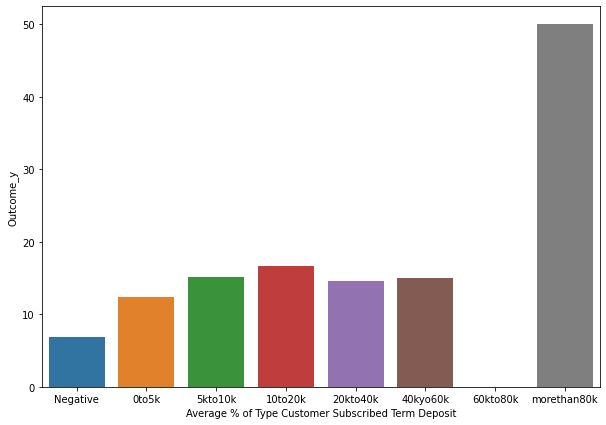

In [192]:
# % of Average Custmer who have subscribed our Product based on bal_Group
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.bal_Group)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

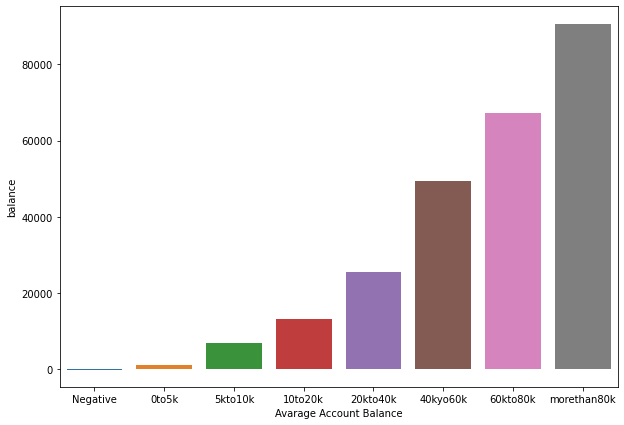

In [193]:
# Avarage  Account Balance of Custmer based on their bal_Group 
plt.figure(figsize=(10,7))
p=sns.barplot(y=x.balance, x = x.bal_Group)
p.set_xlabel("Avarage Account Balance")
plt.show()

# **16.Based on Since No Days last Call to Customer**

Text(0.5, 0, 'More Than 365 Days No last Call to Customer')

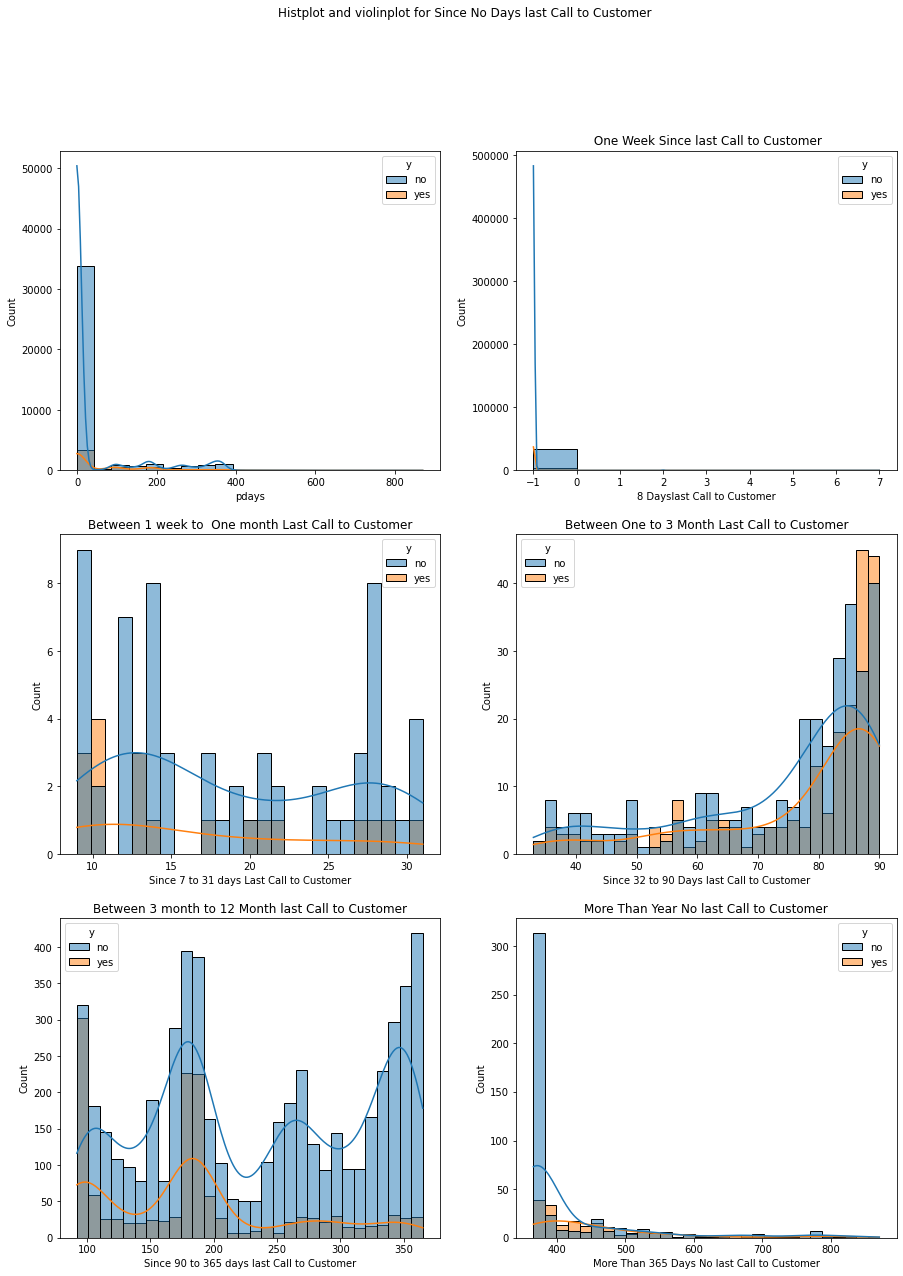

In [194]:
## Finding Relation Based on Since No Days last Call to Customer and Subscription of Term Deposit
fig, axes = plt.subplots(3, 2, figsize=(15,20))
fig.suptitle('Histplot and violinplot for Since No Days last Call to Customer')
# Histplot
sns.histplot(ax=axes[0,0], data=bank_df, x="pdays",hue='y', bins=20,kde=True)
# Histplot  
p=sns.histplot(ax=axes[0,1], data=bank_df, x=bank_df[bank_df['pdays']<8].pdays,hue='y',bins=8,kde=True)
p.set_title(' One Week Since last Call to Customer')
p.set_xlabel('8 Dayslast Call to Customer')
# Histplot  
p=sns.histplot(ax=axes[1,0], data=bank_df, x=bank_df[(bank_df['pdays']>8) & (bank_df['pdays']<=31)].pdays,hue='y',bins=25,kde=True)
p.set_title('Between 1 week to  One month Last Call to Customer')
p.set_xlabel('Since 7 to 31 days Last Call to Customer')
# Histplot  
p=sns.histplot(ax=axes[1,1], data=bank_df, x=bank_df[(bank_df['pdays']>32) & (bank_df['pdays']<=90)].pdays,hue='y',bins=30,kde=True)
p.set_title('Between One to 3 Month Last Call to Customer')
p.set_xlabel('Since 32 to 90 Days last Call to Customer')
# Histplot  
p=sns.histplot(ax=axes[2,0], data=bank_df, x=bank_df[(bank_df['pdays']>91) & (bank_df['pdays']<=365)].pdays,hue='y',bins=30,kde=True)
p.set_title('Between 3 month to 12 Month last Call to Customer')
p.set_xlabel('Since 90 to 365 days last Call to Customer')
# Histplot   
q=sns.histplot(ax=axes[2,1], data=bank_df, x=bank_df[bank_df['pdays']>365].pdays,hue='y',bins=30,kde=True)
q.set_title('More Than Year No last Call to Customer')
q.set_xlabel('More Than 365 Days No last Call to Customer')

In [195]:
#add a new column category next to the Balance group. 
category = pd.cut(bank_df.pdays,bins=[-1,8,30,60,90,180,270,365,1000],labels=['Week','Month','2Month','3rdMonth','2ndQuarter' ,'3rdQuarter','4thQuarter','morethanYear'])
bank_df.insert(16,'LastCall_Group',category)

In [196]:
x = bank_df.groupby('LastCall_Group').mean().reset_index()
x

,LastCall_Group,age,balance,day,duration,campaign,pdays,previous,Outcome_y
0,Week,43.037037,711.601852,13.305556,211.879630,2.212963,4.296296,2.953704,0.092593
1,Month,39.737500,868.300000,13.787500,300.125000,2.225000,17.387500,3.475000,0.225000
2,2Month,42.273585,2611.754717,14.500000,266.424528,1.679245,45.971698,3.405660,0.377358
3,3rdMonth,42.134434,1981.412736,14.709906,283.275943,1.721698,81.997642,3.436321,0.431604
4,2ndQuarter,41.623387,2043.515726,15.210887,259.085484,1.985887,130.528629,3.264919,0.274194
5,3rdQuarter,42.582133,1570.208934,15.213737,264.723343,2.045149,213.395773,3.331412,0.263689
6,4thQuarter,38.553556,1031.345330,12.609683,255.110540,2.194516,328.774636,3.038560,0.101542
7,morethanYear,40.608087,1318.231726,13.752722,254.188180,2.096423,431.542768,2.639191,0.292379


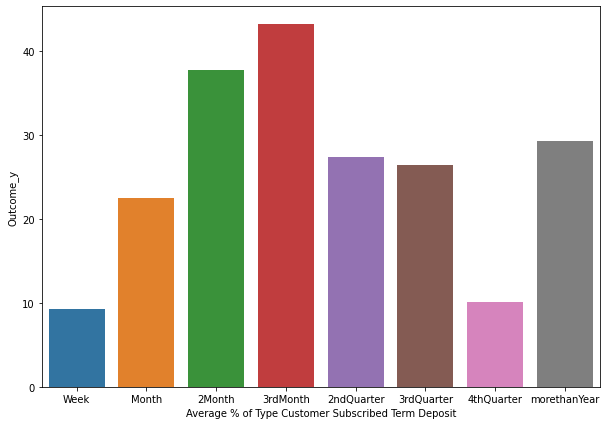

In [197]:
# % of Average Custmer who have subscribed our Product based on LastCall_Group
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.LastCall_Group)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()


# **Handling NaN/ Null/ Missing Values and Outliers if Any**

In [198]:
bank_df2 = bank_df.copy()

In [199]:
bank_df2.drop('y',axis=1,inplace =True)

## **1. Handling NaN/Null/Missing Value in dataset**

In [200]:
bank_df2.isnull().sum()

age                   0
job                   0
Age_Group             0
marital               0
education             0
default               0
balance               0
bal_Group             0
housing               0
loan                  0
contact               0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
LastCall_Group    36954
previous              0
poutcome              0
Outcome_y             0
dtype: int64

In [201]:
bank_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45211 non-null  int64   
 1   job             45211 non-null  object  
 2   Age_Group       45211 non-null  category
 3   marital         45211 non-null  object  
 4   education       45211 non-null  object  
 5   default         45211 non-null  object  
 6   balance         45211 non-null  int64   
 7   bal_Group       45211 non-null  category
 8   housing         45211 non-null  object  
 9   loan            45211 non-null  object  
 10  contact         45211 non-null  object  
 11  day             45211 non-null  int64   
 12  month           45211 non-null  object  
 13  duration        45211 non-null  int64   
 14  campaign        45211 non-null  int64   
 15  pdays           45211 non-null  int64   
 16  LastCall_Group  8257 non-null   category
 17  previous    

## **SO there is no Null /NaN or Any missing Value in the above dataset**

## **2. Handling Outliers In Dataset**

In [202]:
bank_df2.describe()

,age,balance,day,duration,campaign,pdays,previous,Outcome_y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [203]:
bank_df2.describe(include='all')

,age,job,Age_Group,marital,education,default,balance,bal_Group,housing,loan,contact,day,month,duration,campaign,pdays,LastCall_Group,previous,poutcome,Outcome_y
count,45211.000000,45211,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,8257,45211.000000,45211,45211.000000
unique,NaN,12,4,3,4,2,NaN,8,2,2,3,NaN,12,NaN,NaN,NaN,8,NaN,4,NaN
top,NaN,blue-collar,Adult,married,secondary,no,NaN,0to5k,yes,no,cellular,NaN,may,NaN,NaN,NaN,2ndQuarter,NaN,unknown,NaN
freq,NaN,9732,28926,27214,23202,44396,NaN,35086,25130,37967,29285,NaN,13766,NaN,NaN,NaN,2480,NaN,36959,NaN
mean,40.936210,NaN,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,NaN,0.580323,NaN,0.116985
std,10.618762,NaN,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,NaN,2.303441,NaN,0.321406
min,18.000000,NaN,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,NaN,0.000000,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,NaN,0.000000,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,NaN,0.000000,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,NaN,0.000000,NaN,0.000000


## **1.Handling Outliers In Feature Age**

Text(0.5, 1.0, ' Success of Previous Subscription')

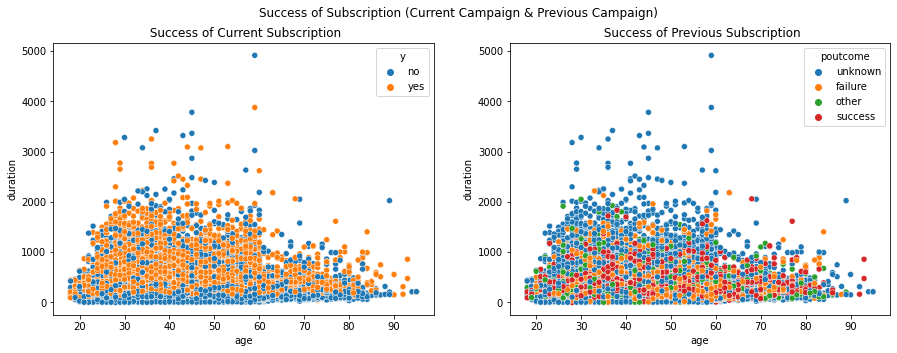

In [204]:
# Corelation Between Age & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['age'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['age'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

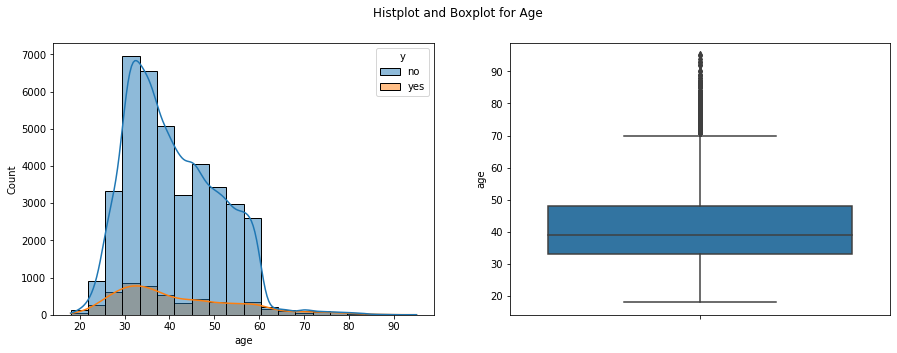

In [205]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for Age')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="age", bins=20,kde=True,hue=bank_df['y'])
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="age")

**So In case of Feature Age Although Age is Showing Outliers to all customer who are having approximately age above 70 years, but we know that age above 70 is not outliers but its variance or spred of data, and custmer above age 70 are very important for us because they are the one who can have maximum possibility to subscribe our Term Deposit which is visible in histoplot also and in above multivariate aanalysis as well so that why we will not be removing that data.**

## **2.Handling Outliers In Feature Balance**

Text(0.5, 1.0, ' Success of Previous Subscription')

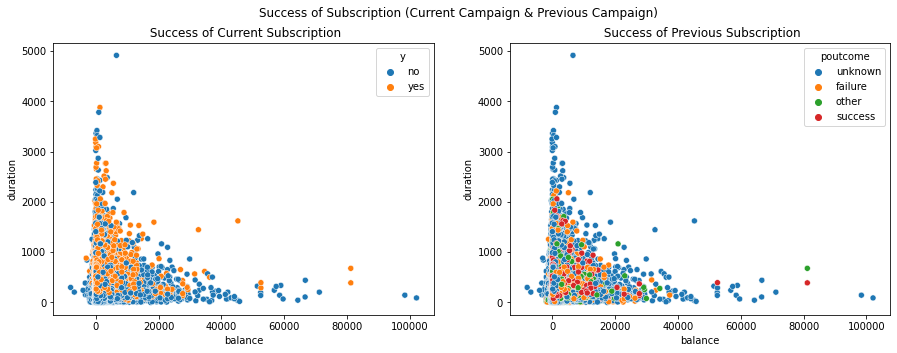

In [206]:
# Corelation Between balance & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['balance'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['balance'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

In [207]:
#lets see percentile from 0 to 100
for i in range(0,100,10):
  balance= bank_df['balance'].values
  balance= np.sort(balance, axis= None)
  print("{} percentile value is {}".format(i, balance[int(len(balance)*(float(i)/100))]))
print("100 percentile value is ",balance[-1])

0 percentile value is -8019
10 percentile value is 0
20 percentile value is 22
30 percentile value is 131
40 percentile value is 272
50 percentile value is 448
60 percentile value is 701
70 percentile value is 1126
80 percentile value is 1859
90 percentile value is 3574
100 percentile value is  102127


In [208]:
#lets see percentile from 90 to 100 
for i in range(90,100):
  balance= bank_df['balance'].values
  balance= np.sort(balance, axis= None)
  print("{} percentile value is {}".format(i, balance[int(len(balance)*(float(i)/100))]))
print("100 percentile value is ",balance[-1])

90 percentile value is 3574
91 percentile value is 3867
92 percentile value is 4262
93 percentile value is 4688
94 percentile value is 5137
95 percentile value is 5768
96 percentile value is 6573
97 percentile value is 7780
98 percentile value is 9444
99 percentile value is 13165
100 percentile value is  102127


In [209]:
# Lets Cap Outliers @ Balance 40000 
bank_df = bank_df[bank_df.balance <= 40000]
bank_df = bank_df[bank_df.balance >= -1000]

Text(0.5, 1.0, 'After Removal of Outliers')

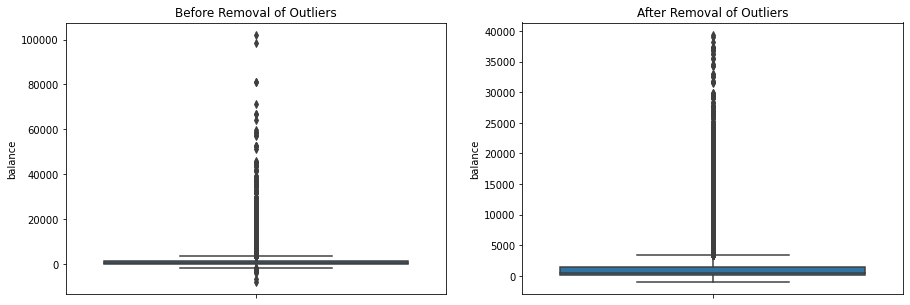

In [210]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# BoxPlot
p=sns.boxplot(ax=axes[0],data=bank_df2, y="balance")
p.set_title('Before Removal of Outliers')
# BoxPlot
p=sns.boxplot(ax=axes[1],data=bank_df, y="balance")
p.set_title('After Removal of Outliers')

In [211]:
# Bank_df Actual data(45211, 17)
bank_df.shape

(45039, 21)

## **3.Handling Outliers In Feature campaign**

Text(0.5, 1.0, ' Success of Previous Subscription')

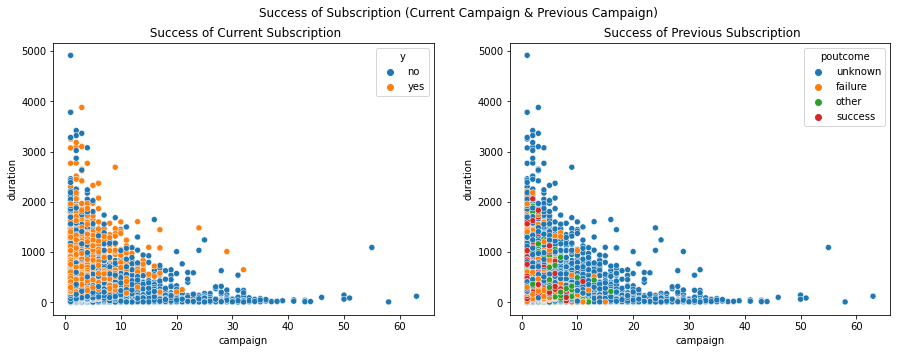

In [212]:
# Corelation Between campaign & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['campaign'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['campaign'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

In [213]:
# Lets Cap Outliers @ campaign 32
bank_df = bank_df[bank_df.campaign <= 32]


Text(0.5, 1.0, 'After Removal of Outliers')

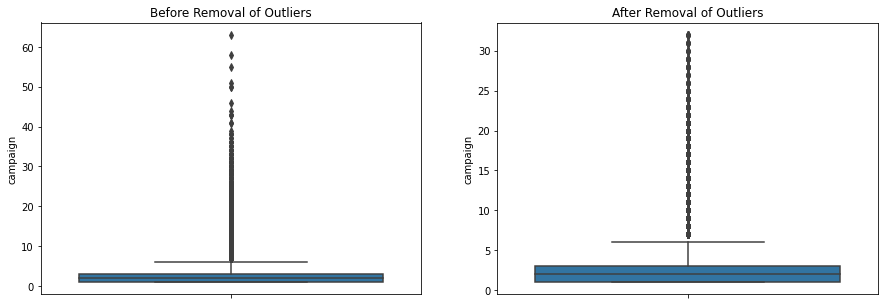

In [214]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# BoxPlot
p=sns.boxplot(ax=axes[0],data=bank_df2, y="campaign")
p.set_title('Before Removal of Outliers')
# BoxPlot
p=sns.boxplot(ax=axes[1],data=bank_df, y="campaign")
p.set_title('After Removal of Outliers')

In [215]:
bank_df.shape

(45001, 21)

## **4.Handling Outliers In Feature previous**

Text(0.5, 1.0, ' Success of Previous Subscription')

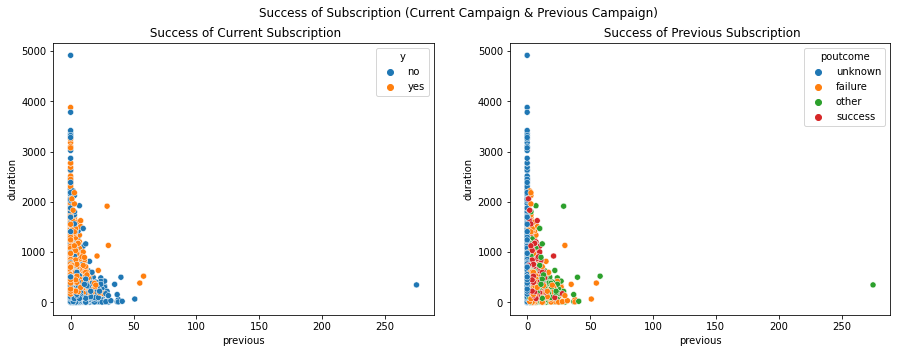

In [216]:
# Corelation Between previous & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['previous'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['previous'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

In [217]:
# Lets Cap Outliers @ previous 30
bank_df = bank_df[bank_df.previous <= 30]


Text(0.5, 1.0, 'After Removal of Outliers')

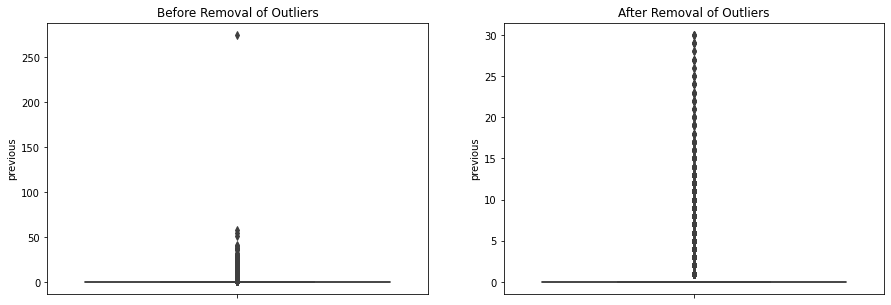

In [218]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# BoxPlot
p=sns.boxplot(ax=axes[0],data=bank_df2, y="previous")
p.set_title('Before Removal of Outliers')
# BoxPlot
p=sns.boxplot(ax=axes[1],data=bank_df, y="previous")
p.set_title('After Removal of Outliers')

In [219]:
bank_df.shape

(44989, 21)

## **5.Handling Outliers In Feature pdays**

Text(0.5, 1.0, ' Success of Previous Subscription')

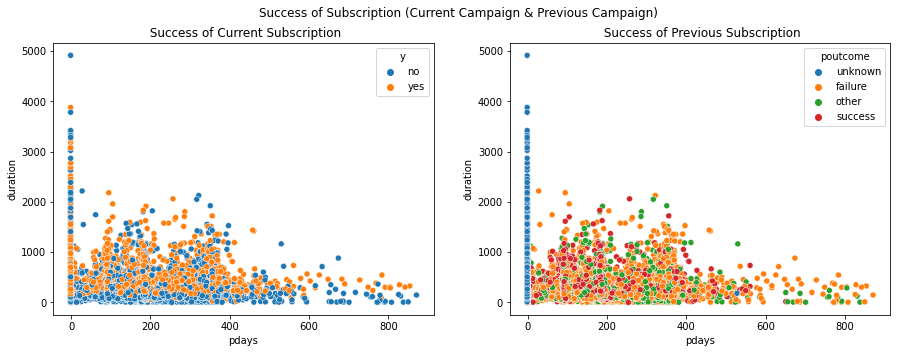

In [220]:
# Corelation Between pdays & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['pdays'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['pdays'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

Text(0.5, 1.0, 'After Removal of Outliers')

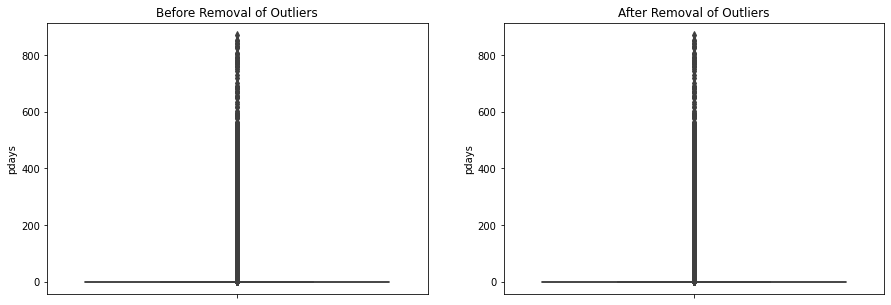

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# BoxPlot
p=sns.boxplot(ax=axes[0],data=bank_df2, y="pdays")
p.set_title('Before Removal of Outliers')
# BoxPlot
p=sns.boxplot(ax=axes[1],data=bank_df, y="pdays")
p.set_title('After Removal of Outliers')

## **6.Handling Outliers In Feature day**

Text(0.5, 1.0, ' Success of Previous Subscription')

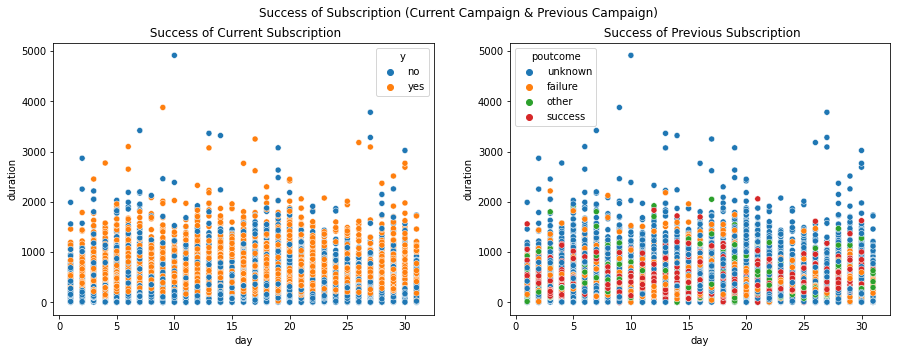

In [222]:
# Corelation Between day & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['day'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['day'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

In [223]:
# Lets Cap Outliers @ previous 30
bank_df = bank_df[bank_df.duration <= 4000]

In [224]:
bank_df.shape

(44988, 21)

# **So Consistaly we have seen for all features there is not any subscription of our plan even in Current Campaign as well as for previous campaign  where call duration is more than 4000 seconds so thats why capping outliers where call duration is beyond 4000 seconds.**

In [225]:
# find Numerical variables
numerical = [var for var in bank_df2.columns if bank_df2[var].dtype =='int']
print('There are {} numerical variables'.format(len(numerical)))
numerical

There are 8 numerical variables


['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'Outcome_y']

# **Distubution Plot and Box Plot After Removal of outliers**

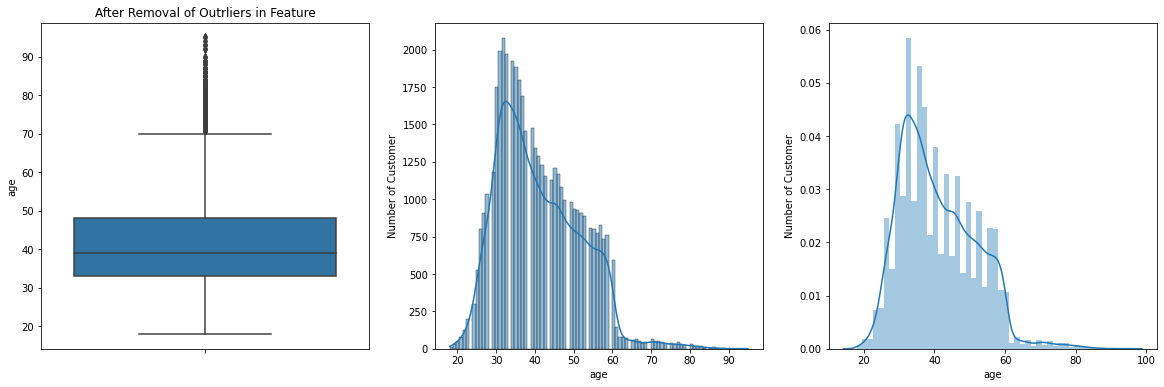

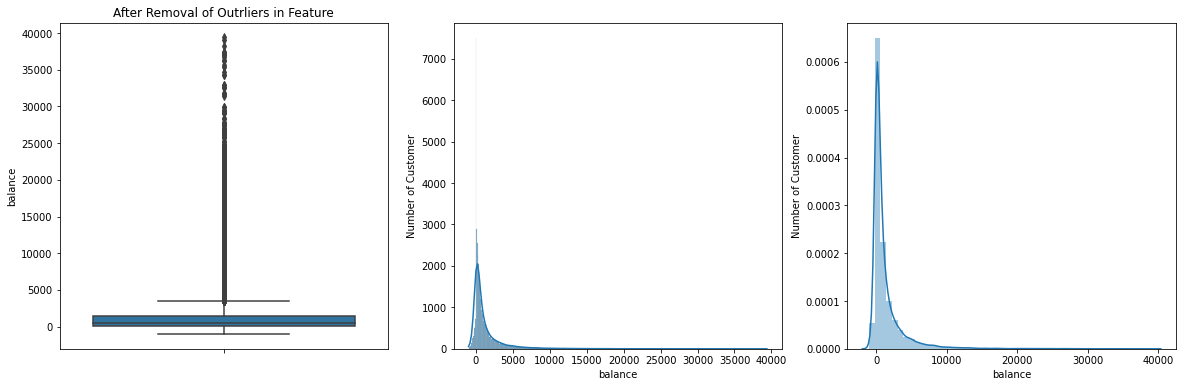

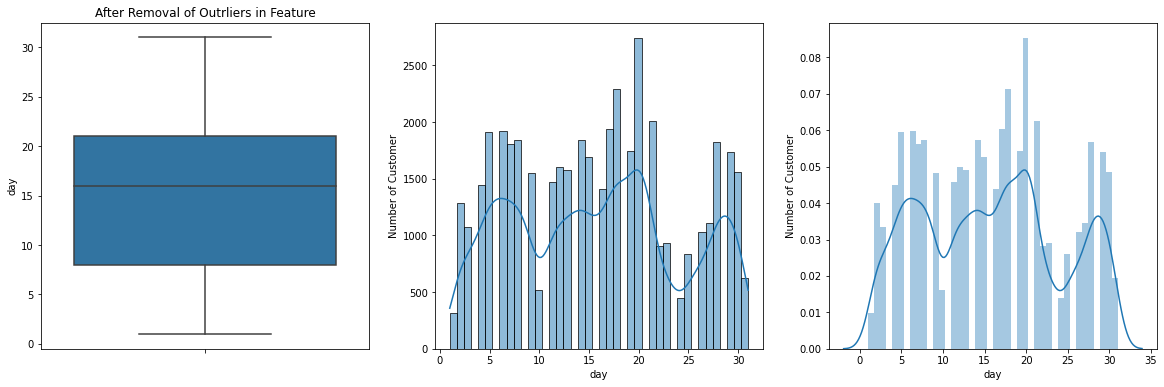

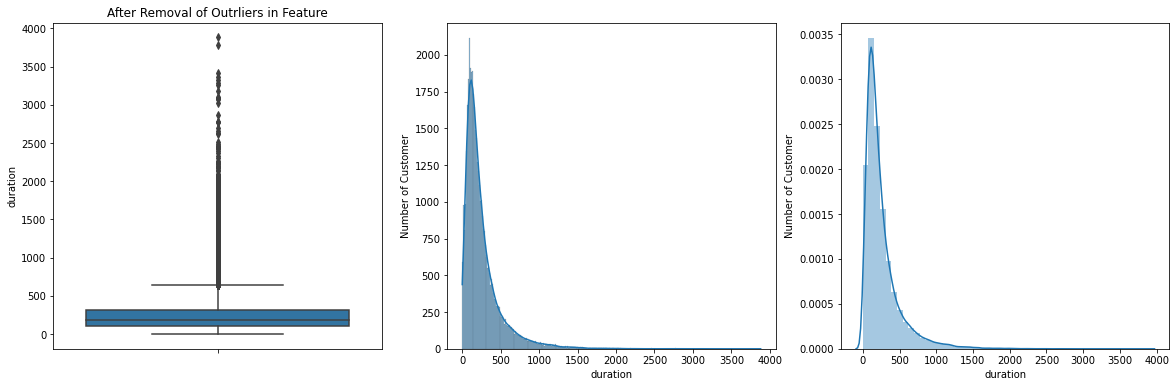

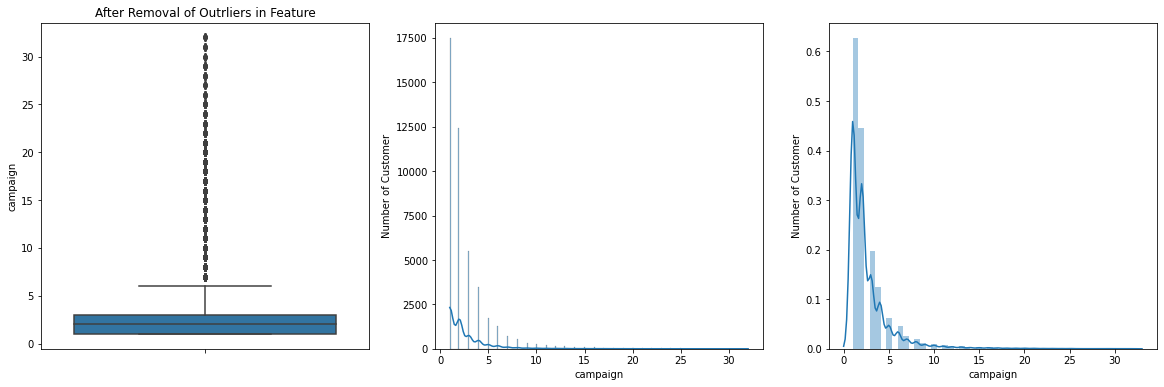

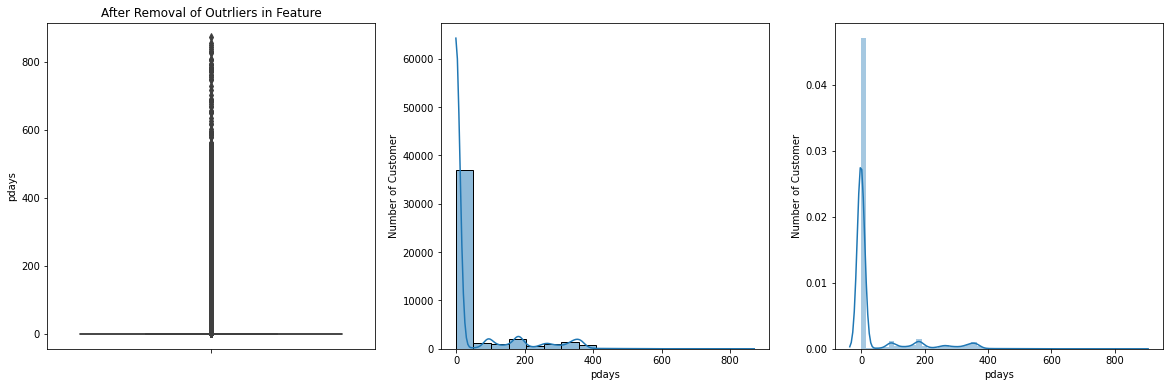

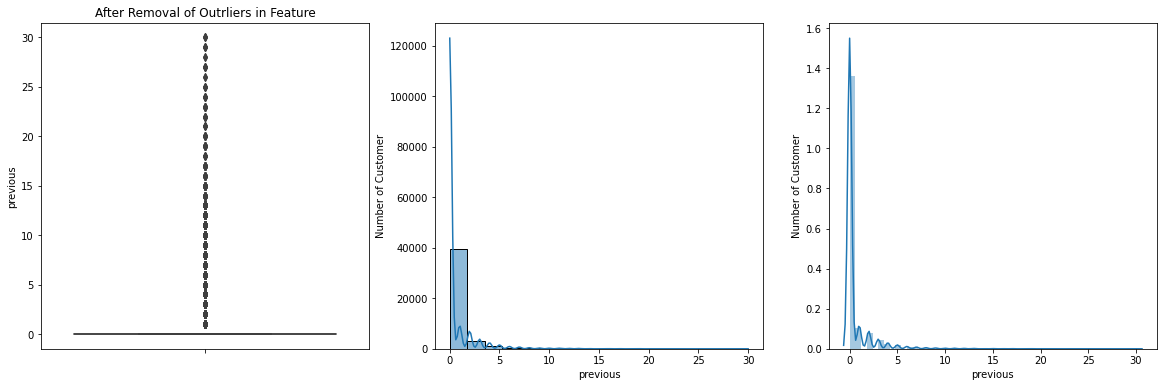

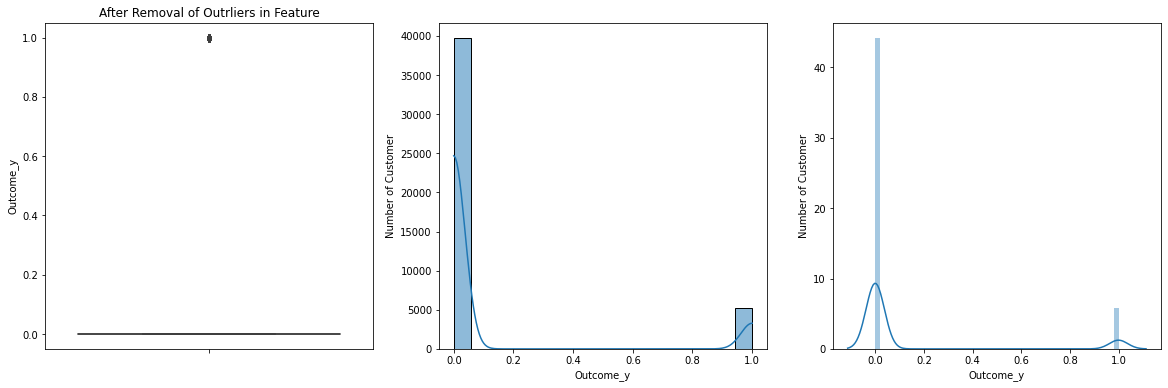

In [226]:
for var in numerical:
    plt.figure(figsize=(20,6))
    plt.subplot(1, 3, 1)
    fig = sns.boxplot(y=bank_df[var])
    fig.set_title('After Removal of Outrliers in Feature')
    fig.set_ylabel(var)
    
    plt.subplot(1, 3, 2)
    fig=sns.histplot( x=bank_df[var],kde=True)
    fig.set_ylabel('Number of Customer')
    fig.set_xlabel(var)

    plt.subplot(1, 3, 3)
    fig = sns.distplot(bank_df[var])
    # sns.distplot((data_train['GrLivArea']+1).transform(np.log), fit=norm);
    # fig = plt.figure()
    fig.set_ylabel('Number of Customer')
    fig.set_xlabel(var)
    plt.show()

# **Feature Engineering**

# **1.Creation of New Feature by Lable Encoding & One hot Encoding**

In [227]:
bank_df.describe(include = 'all')

,age,job,Age_Group,marital,education,default,balance,bal_Group,housing,loan,...,day,month,duration,campaign,pdays,LastCall_Group,previous,poutcome,y,Outcome_y
count,44988.000000,44988,44988,44988,44988,44988,44988.000000,44988,44988,44988,...,44988.000000,44988,44988.000000,44988.000000,44988.000000,8233,44988.000000,44988,44988,44988.000000
unique,NaN,12,4,3,4,2,NaN,5,2,2,...,NaN,12,NaN,NaN,NaN,8,NaN,4,2,NaN
top,NaN,blue-collar,Adult,married,secondary,no,NaN,0to5k,yes,no,...,NaN,may,NaN,NaN,NaN,2ndQuarter,NaN,unknown,no,NaN
freq,NaN,9700,28782,27058,23101,44223,NaN,35051,24968,37826,...,NaN,13700,NaN,NaN,NaN,2476,NaN,36760,39711,NaN
mean,40.925714,NaN,NaN,NaN,NaN,NaN,1336.774251,NaN,NaN,NaN,...,15.795857,NaN,258.331088,2.730728,40.241442,NaN,0.565884,NaN,NaN,0.117298
std,10.620082,NaN,NaN,NaN,NaN,NaN,2671.051595,NaN,NaN,NaN,...,8.317089,NaN,256.728040,2.896531,100.081915,NaN,1.792413,NaN,NaN,0.321779
min,18.000000,NaN,NaN,NaN,NaN,NaN,-999.000000,NaN,NaN,NaN,...,1.000000,NaN,0.000000,1.000000,-1.000000,NaN,0.000000,NaN,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,...,8.000000,NaN,103.000000,1.000000,-1.000000,NaN,0.000000,NaN,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,NaN,451.000000,NaN,NaN,NaN,...,16.000000,NaN,180.000000,2.000000,-1.000000,NaN,0.000000,NaN,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,NaN,1430.000000,NaN,NaN,NaN,...,21.000000,NaN,319.000000,3.000000,-1.000000,NaN,0.000000,NaN,NaN,0.000000


**I. First Lets Convert Categorical Fetaure which are having two class output (Yes/No) into Neumarical Feaures because Machine Learning Algorithem Only Accept Neumarical Features.**

In [228]:
bank_df.drop(['y','LastCall_Group'], axis = 1, inplace =True)

In [229]:
bank_df['default'] = (bank_df['default']=='yes').astype(int)
bank_df['housing'] = (bank_df['housing']=='yes').astype(int)
bank_df['loan'] = (bank_df['loan']=='yes').astype(int)
bank_df.head()

,age,job,Age_Group,marital,education,default,balance,bal_Group,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Outcome_y
0,58,management,Upper_Middle,married,tertiary,0,2143,0to5k,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,Adult,single,secondary,0,29,0to5k,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,Adult,married,secondary,0,2,0to5k,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,Adult,married,unknown,0,1506,0to5k,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,Adult,single,unknown,0,1,0to5k,0,0,unknown,5,may,198,1,-1,0,unknown,0


**II. Now Lets Convert Remaining Categorical Fetaure into Neumarical Feaures because Machine Learning Algorithem Only Accept Neumarical Features.**

In [230]:
# find categorical variables
categorical = [var for var in bank_df.columns if bank_df[var].dtype !='int']
print('There are {} categorical variables'.format(len(categorical)))
categorical

There are 8 categorical variables


['job',
 'Age_Group',
 'marital',
 'education',
 'bal_Group',
 'contact',
 'month',
 'poutcome']

In [231]:
# Number of labels: cardinality
#Let's now check if our categorical variables have a huge number of categories. 
#This may be a problem for some machine learning models.
for var in categorical:
  print('--'*50)
  print(var, ' contains ', bank_df[var].unique(), ' labels')
  print(var, ' contains ', len(bank_df[var].unique()), ' labels')

----------------------------------------------------------------------------------------------------
job  contains  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']  labels
job  contains  12  labels
----------------------------------------------------------------------------------------------------
Age_Group  contains  ['Upper_Middle', 'Adult', 'young', 'Elderly']
Categories (4, object): ['young' < 'Adult' < 'Upper_Middle' < 'Elderly']  labels
Age_Group  contains  4  labels
----------------------------------------------------------------------------------------------------
marital  contains  ['married' 'single' 'divorced']  labels
marital  contains  3  labels
----------------------------------------------------------------------------------------------------
education  contains  ['tertiary' 'secondary' 'unknown' 'primary']  labels
education  contains  4  labels
-------------------------

**III. Lets Use One hot Encoding to create Dummy Variable of following Multiclass Features from the Data.**

In [ ]:
#Creation of Dummy Feature By One hot Encoding
bank_df = pd.get_dummies(bank_df, columns = ['job','marital','education','contact', 'poutcome'],prefix=['job','marital','education','contact', 'poutcome'])

IV. Lets Use lable Encoding to Convert Month Feature into Numarical Feature

In [236]:
# Lets map the month Feature into Numarical feature
bank_df['Month'] = bank_df['month'].map({'dec':0,'mar':1,'sep':2,'oct':3,'jan':4,'feb':5,'apr':6,'nov':7,'jun':8,'aug':3,'jul':4,'may':5})

In [238]:
# Lets Drop the Other Variable which we have converted into Numarical Features
bank_df.drop(['Age_Group','bal_Group','month'],axis= 1, inplace = True)

In [239]:
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Month
0,58,0,2143,1,0,5,261,1,-1,0,...,1,0,0,0,1,0,0,0,1,5
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,1,0,0,0,1,5
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,1,0,0,0,1,5
3,47,0,1506,1,0,5,92,1,-1,0,...,0,1,0,0,1,0,0,0,1,5
4,33,0,1,0,0,5,198,1,-1,0,...,0,1,0,0,1,0,0,0,1,5


In [241]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44988 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  44988 non-null  int64
 1   default              44988 non-null  int64
 2   balance              44988 non-null  int64
 3   housing              44988 non-null  int64
 4   loan                 44988 non-null  int64
 5   day                  44988 non-null  int64
 6   duration             44988 non-null  int64
 7   campaign             44988 non-null  int64
 8   pdays                44988 non-null  int64
 9   previous             44988 non-null  int64
 10  Outcome_y            44988 non-null  int64
 11  job_admin.           44988 non-null  uint8
 12  job_blue-collar      44988 non-null  uint8
 13  job_entrepreneur     44988 non-null  uint8
 14  job_housemaid        44988 non-null  uint8
 15  job_management       44988 non-null  uint8
 16  job_retired          4

In [240]:
bank_df.isnull().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
Outcome_y              0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
Month                  0
dtype: int64

## **So Now our dataset is having no null or any missing value and all Numarical Features So now lets check the corelation between the different Features aandf then select dependant & Indepedent features Accordingaly.**


# **Finding correlation in variables (both dependent and independent**

# **Decision Tree, Ensemble of decision trees, Naïve Bayes Classifier, and Support Vector Machine, are not sensitive to outliers.**

**Linear Regression, Logistic Regression, KMeans Clustering, Hierchical Clustering, and Nerual Networks are sensitive to outliers.**


**Naive Bayes Classifier, Support Vector Machine, Decision Tree, Ensemble Techniques, and K-Nearest Neighbours**.